In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# /content/logistic_regression.csv
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:01<00:00, 84.2MB/s]


In [ ]:
# Reading the input file
df = pd.read_csv('logistic_regression.csv')

In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
df.head(5)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [ ]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape[0]

396030

# **HANDLE MISSING VALUES**

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
df['emp_title'] = df['emp_title'].fillna('Unknown')

In [ ]:
df['emp_length'] = df['emp_length'].fillna('Unknown')

In [ ]:
df['title'] = df['title'].fillna('Unknown')

In [ ]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

In [ ]:
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].median())

In [ ]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())

In [ ]:
#All missing values have been replaced

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [ ]:
df['term_numeric'] = df['term'].apply(lambda x: x.replace("months","")).astype(int)

In [ ]:
df.drop('term',axis=1,inplace=True)

In [ ]:
df.head(5)

loan_amnt  int_rate  installment grade sub_grade                emp_title  \
0    10000.0     11.44       329.48     B        B4                Marketing   
1     8000.0     11.99       265.68     B        B5          Credit analyst    
2    15600.0     10.49       506.97     B        B3             Statistician   
3     7200.0      6.49       220.65     A        A2          Client Advocate   
4    24375.0     17.27       609.33     C        C5  Destiny Management Inc.   

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years           RENT    117000.0        Not Verified  Jan-2015   
1    4 years       MORTGAGE     65000.0        Not Verified  Jan-2015   
2   < 1 year           RENT     43057.0     Source Verified  Jan-2015   
3    6 years           RENT     54000.0        Not Verified  Nov-2014   
4    9 years       MORTGAGE     55000.0            Verified  Apr-2013   

   loan_status             purpose                    title    dti  \
0   Fully Paid            vacation                 Vacation  26.24   
1   Fully Paid  debt_consolidation       Debt consolidation  22.05   
2   Fully Paid         credit_card  Credit card refinancing  12.79   
3   Fully Paid         credit_card  Credit card refinancing   2.60   
4  Charged Off         credit_card    Credit Card Refinance  33.95   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2         Aug-2007      13.0      0.0    11987.0        92.2       26.0   
3         Sep-2006       6.0      0.0     5472.0        21.5       13.0   
4         Mar-1999      13.0      0.0    24584.0        69.8       43.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   
2                   f       INDIVIDUAL       0.0                   0.0   
3                   f       INDIVIDUAL       0.0                   0.0   
4                   f       INDIVIDUAL       1.0                   0.0   

                                             address  term_numeric  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690            36  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113            36  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113            36  
3            823 Reid Ford\r\nDelacruzside, MA 00813            36  
4             679 Luna Roads\r\nGreggshire, VA 11650            60

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [ ]:
df.select_dtypes(exclude='object').describe()


loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  \
count  396030.000000  396030.000000  396030.000000         396030.000000   
mean       53.792451      25.414744       1.736308              0.121483   
std        24.443685      11.886991       2.056819              0.355962   
min         0.000000       2.000000       0.000000              0.000000   
25%        35.900000      17.000000       0.000000              0.000000   
50%        54.800000      24.000000       1.000000              0.000000   
75%        72.900000      32.000000       3.000000              0.000000   
max       892.300000     151.000000      34.000000              8.000000   

        term_numeric  
count  396030.000000  
mean       41.698053  
std        10.212038  
min        36.000000  
25%        36.000000  
50%        36.000000  
75%        36.000000  
max        60.000000

# **UNIVARIATE ANALYSIS**

In [ ]:
df_fully_paid = df[df['loan_status'] == 'Fully Paid']
df_charged_off = df[df['loan_status'] == 'Charged Off']

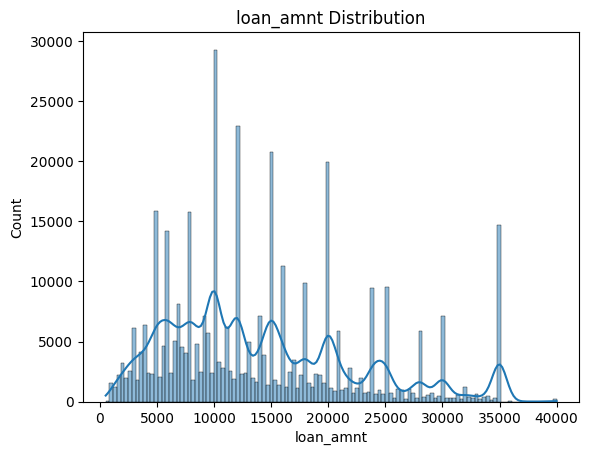

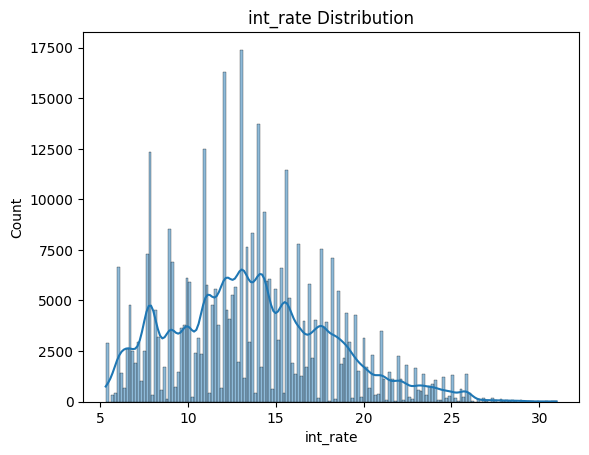

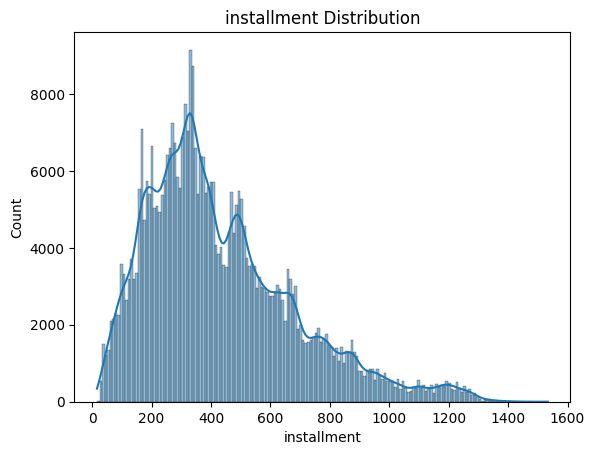

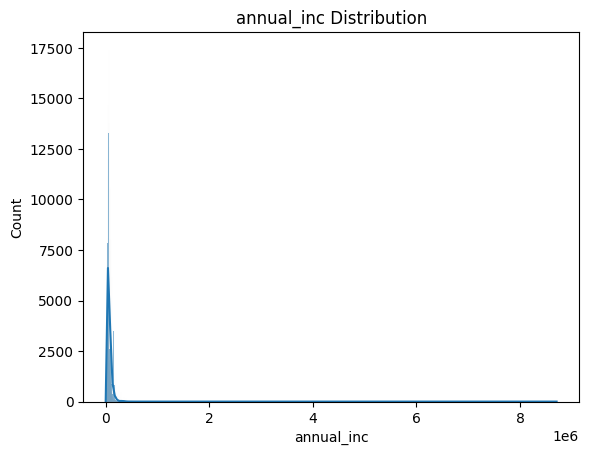

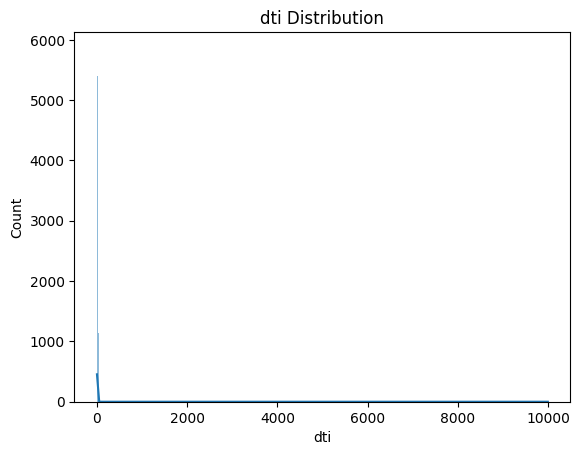

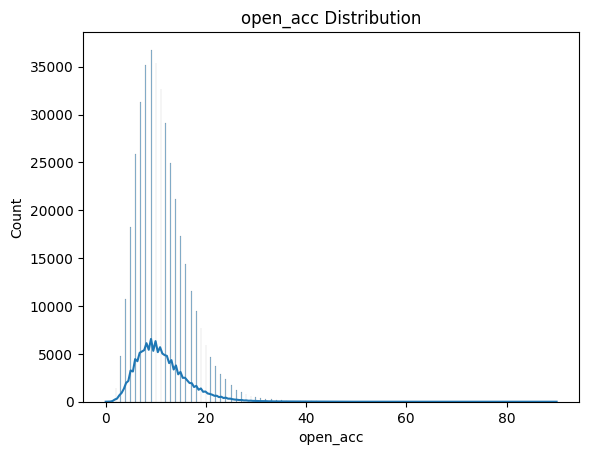

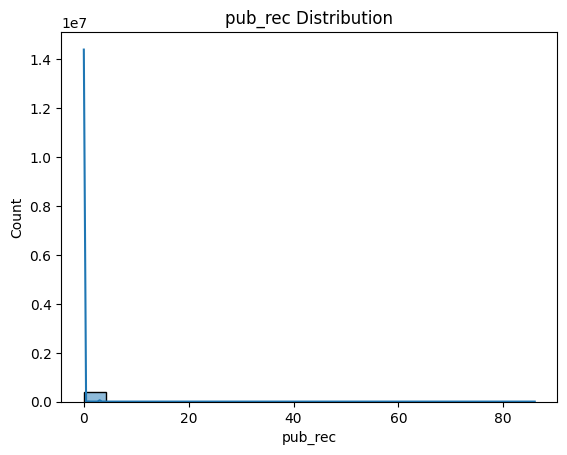

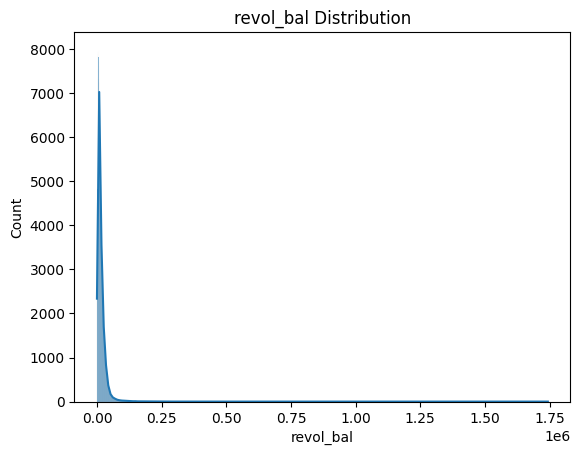

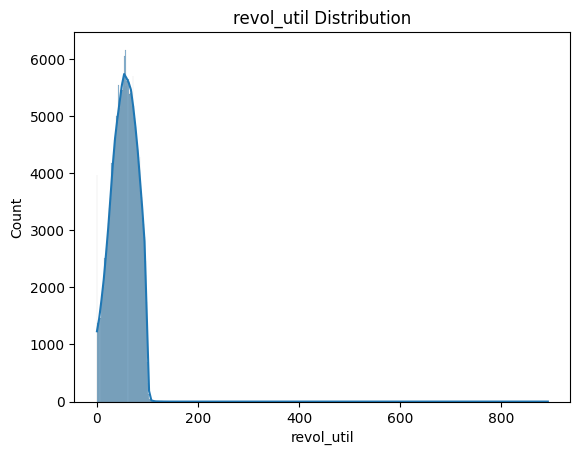

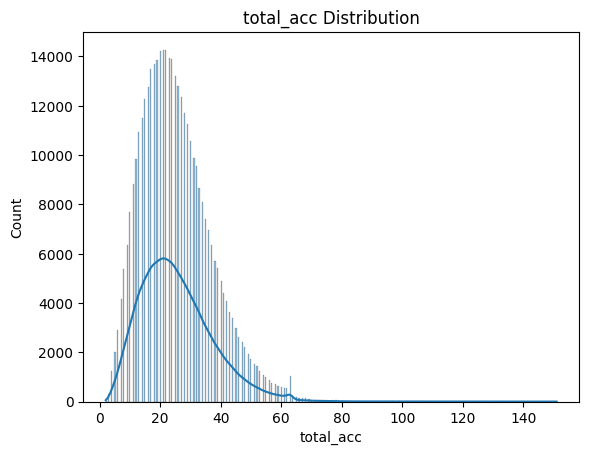

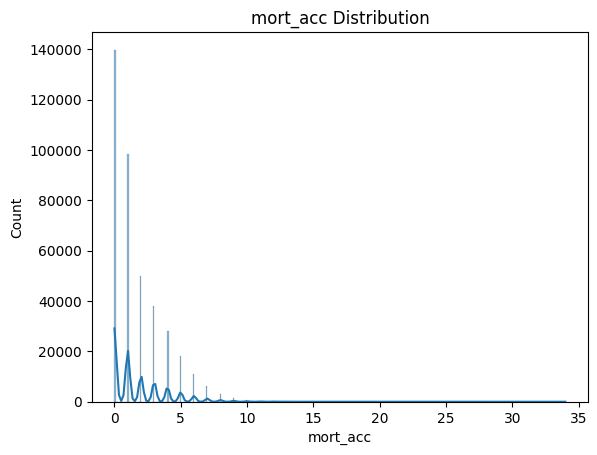

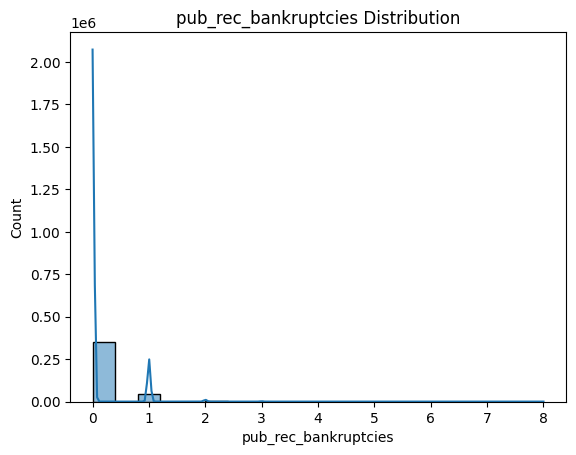

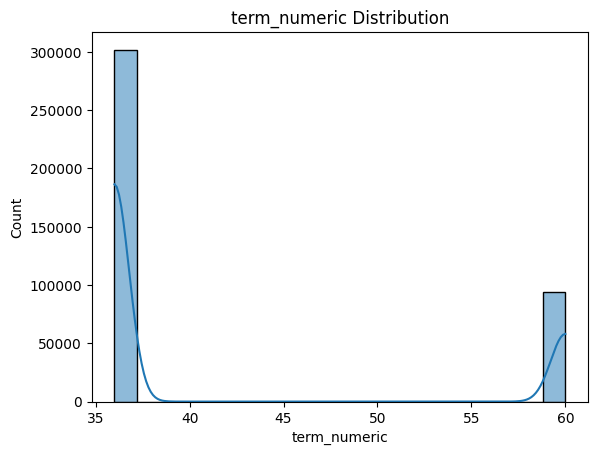

In [ ]:
for col in df.select_dtypes(exclude='object').columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

**SUMMARY HISTPLOT :** most of the columns distributions approximate normal distribution with some of the columns right skewed because of the outliers







In [ ]:
df_object = df.select_dtypes(include='object')

In [ ]:
df.head()

loan_amnt  int_rate  installment grade sub_grade                emp_title  \
0    10000.0     11.44       329.48     B        B4                Marketing   
1     8000.0     11.99       265.68     B        B5          Credit analyst    
2    15600.0     10.49       506.97     B        B3             Statistician   
3     7200.0      6.49       220.65     A        A2          Client Advocate   
4    24375.0     17.27       609.33     C        C5  Destiny Management Inc.   

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years           RENT    117000.0        Not Verified  Jan-2015   
1    4 years       MORTGAGE     65000.0        Not Verified  Jan-2015   
2   < 1 year           RENT     43057.0     Source Verified  Jan-2015   
3    6 years           RENT     54000.0        Not Verified  Nov-2014   
4    9 years       MORTGAGE     55000.0            Verified  Apr-2013   

   loan_status             purpose                    title    dti  \
0   Fully Paid            vacation                 Vacation  26.24   
1   Fully Paid  debt_consolidation       Debt consolidation  22.05   
2   Fully Paid         credit_card  Credit card refinancing  12.79   
3   Fully Paid         credit_card  Credit card refinancing   2.60   
4  Charged Off         credit_card    Credit Card Refinance  33.95   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2         Aug-2007      13.0      0.0    11987.0        92.2       26.0   
3         Sep-2006       6.0      0.0     5472.0        21.5       13.0   
4         Mar-1999      13.0      0.0    24584.0        69.8       43.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   
2                   f       INDIVIDUAL       0.0                   0.0   
3                   f       INDIVIDUAL       0.0                   0.0   
4                   f       INDIVIDUAL       1.0                   0.0   

                                             address  term_numeric  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690            36  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113            36  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113            36  
3            823 Reid Ford\r\nDelacruzside, MA 00813            36  
4             679 Luna Roads\r\nGreggshire, VA 11650            60

In [ ]:
df_fully_paid.groupby("emp_title").agg({"annual_inc":"sum"}).sort_values(by="annual_inc",ascending=False)


annual_inc
emp_title                                 
Unknown                       1.024364e+09
Manager                       2.702788e+08
Teacher                       2.245325e+08
Registered Nurse              1.266069e+08
Director                      1.222034e+08
...                                    ...
Distributer                   5.000000e+03
RPS Dining Service            5.000000e+03
public partnership            4.888000e+03
Yogurt Stop                   4.800000e+03
The Art Institute of Phoenix  4.800000e+03

[145236 rows x 1 columns]

In [ ]:
df_new = df_object.loc[:, df_object.nunique() <= 20]

In [ ]:
df_new.head(3)

grade emp_length home_ownership verification_status loan_status  \
0     B  10+ years           RENT        Not Verified  Fully Paid   
1     B    4 years       MORTGAGE        Not Verified  Fully Paid   
2     B   < 1 year           RENT     Source Verified  Fully Paid   

              purpose initial_list_status application_type  
0            vacation                   w       INDIVIDUAL  
1  debt_consolidation                   f       INDIVIDUAL  
2         credit_card                   f       INDIVIDUAL

<Axes: xlabel='purpose', ylabel='count'>

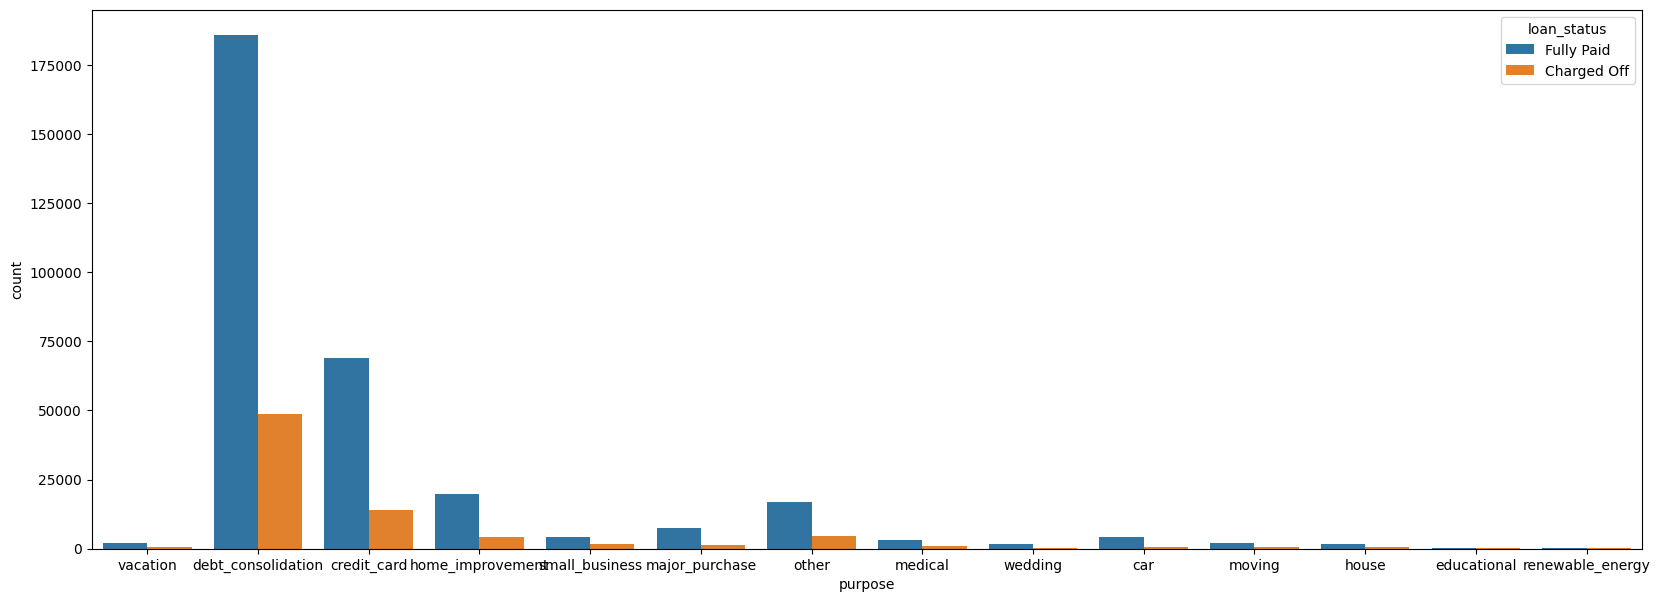

In [ ]:
plt.figure(figsize=(20, 7))

sns.countplot(x='purpose',data=df_new, hue='loan_status')


Highest loan defaults occur when there is debt consolidation by borrowers,

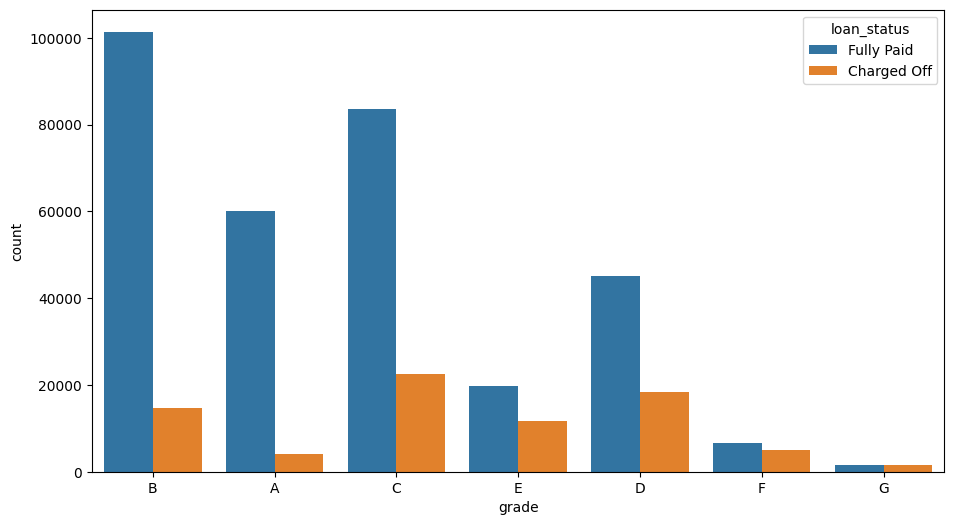

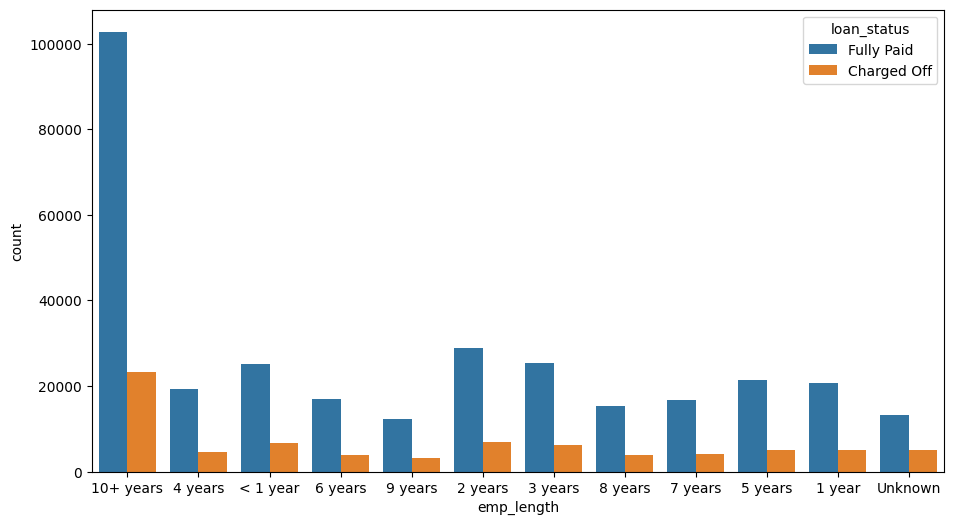

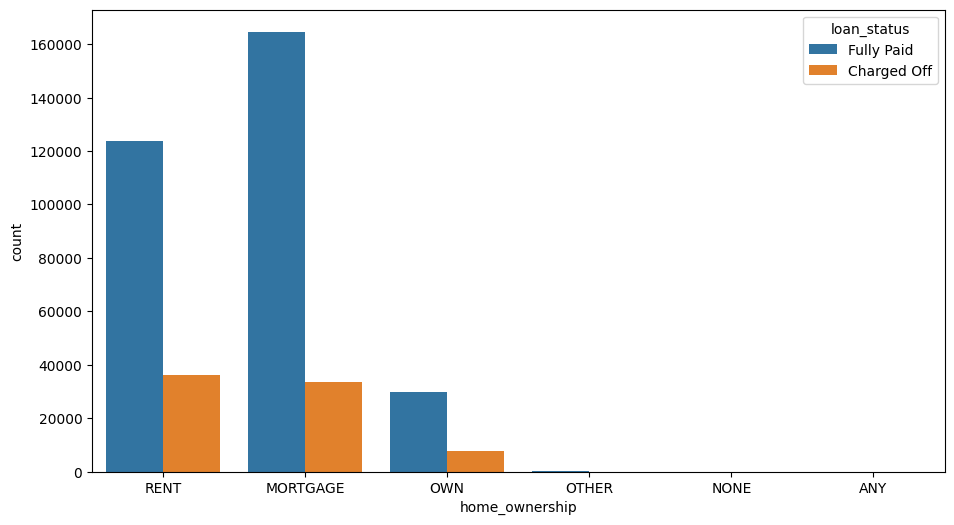

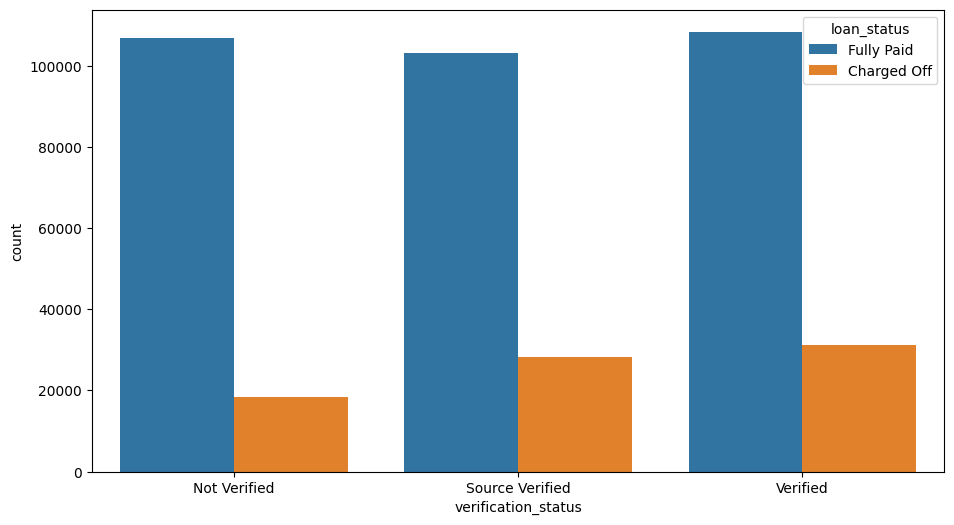

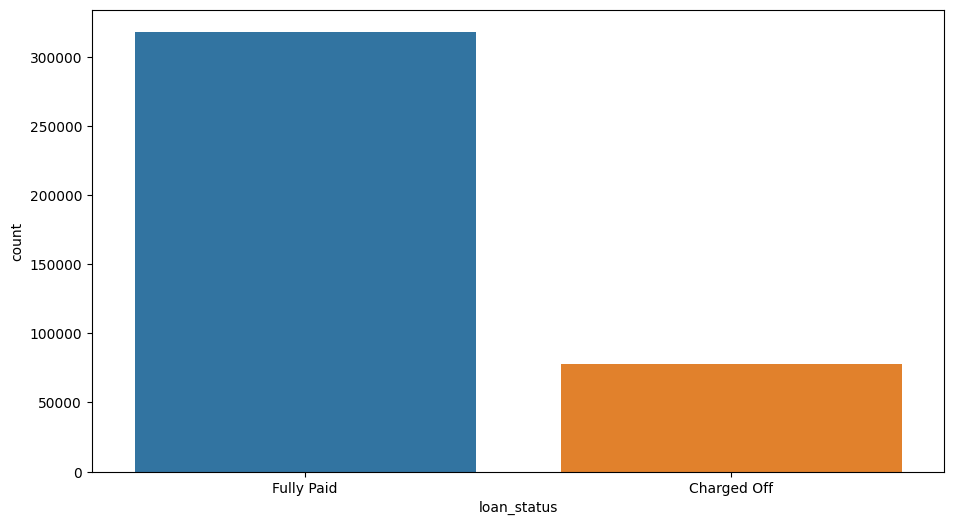

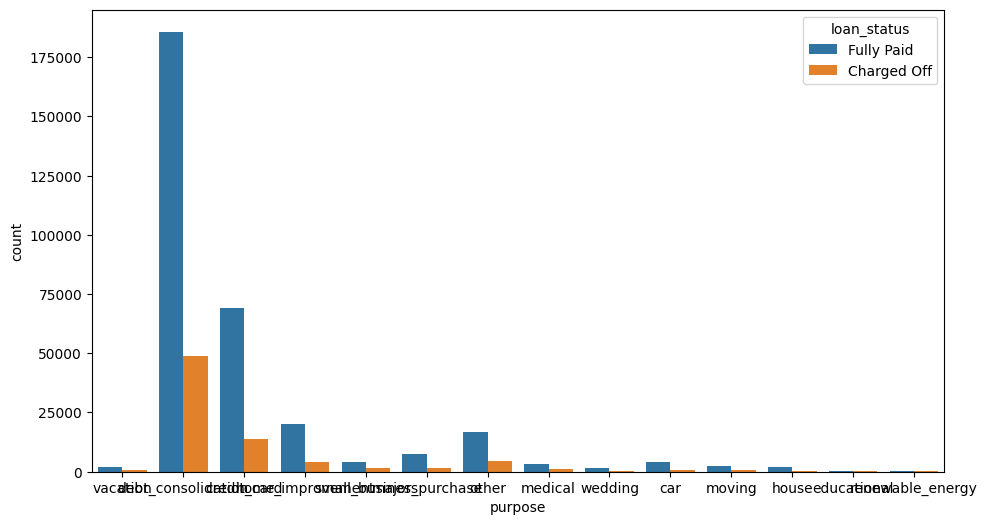

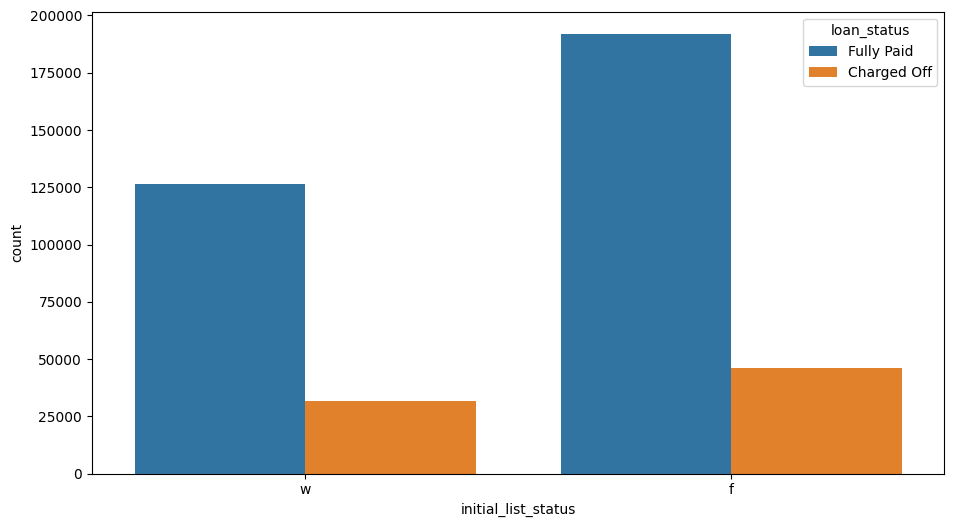

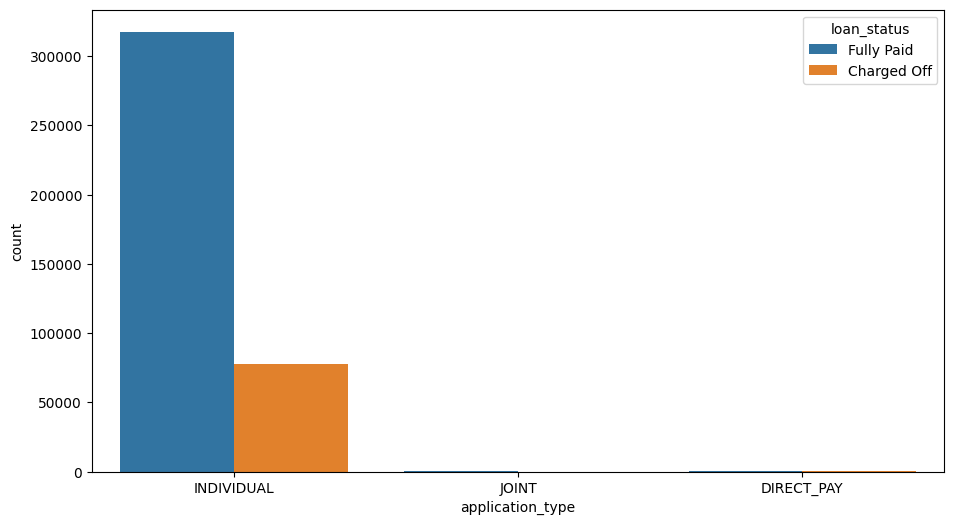

In [ ]:
for col in df_new.columns:
    plt.figure(figsize=(11,6))
    sns.countplot(x=col,data=df_new, hue='loan_status')
    plt.show()

Important determinants of loan being defaulted
1. grade
2. purpose
3. Type of home ownership
4. emp_length


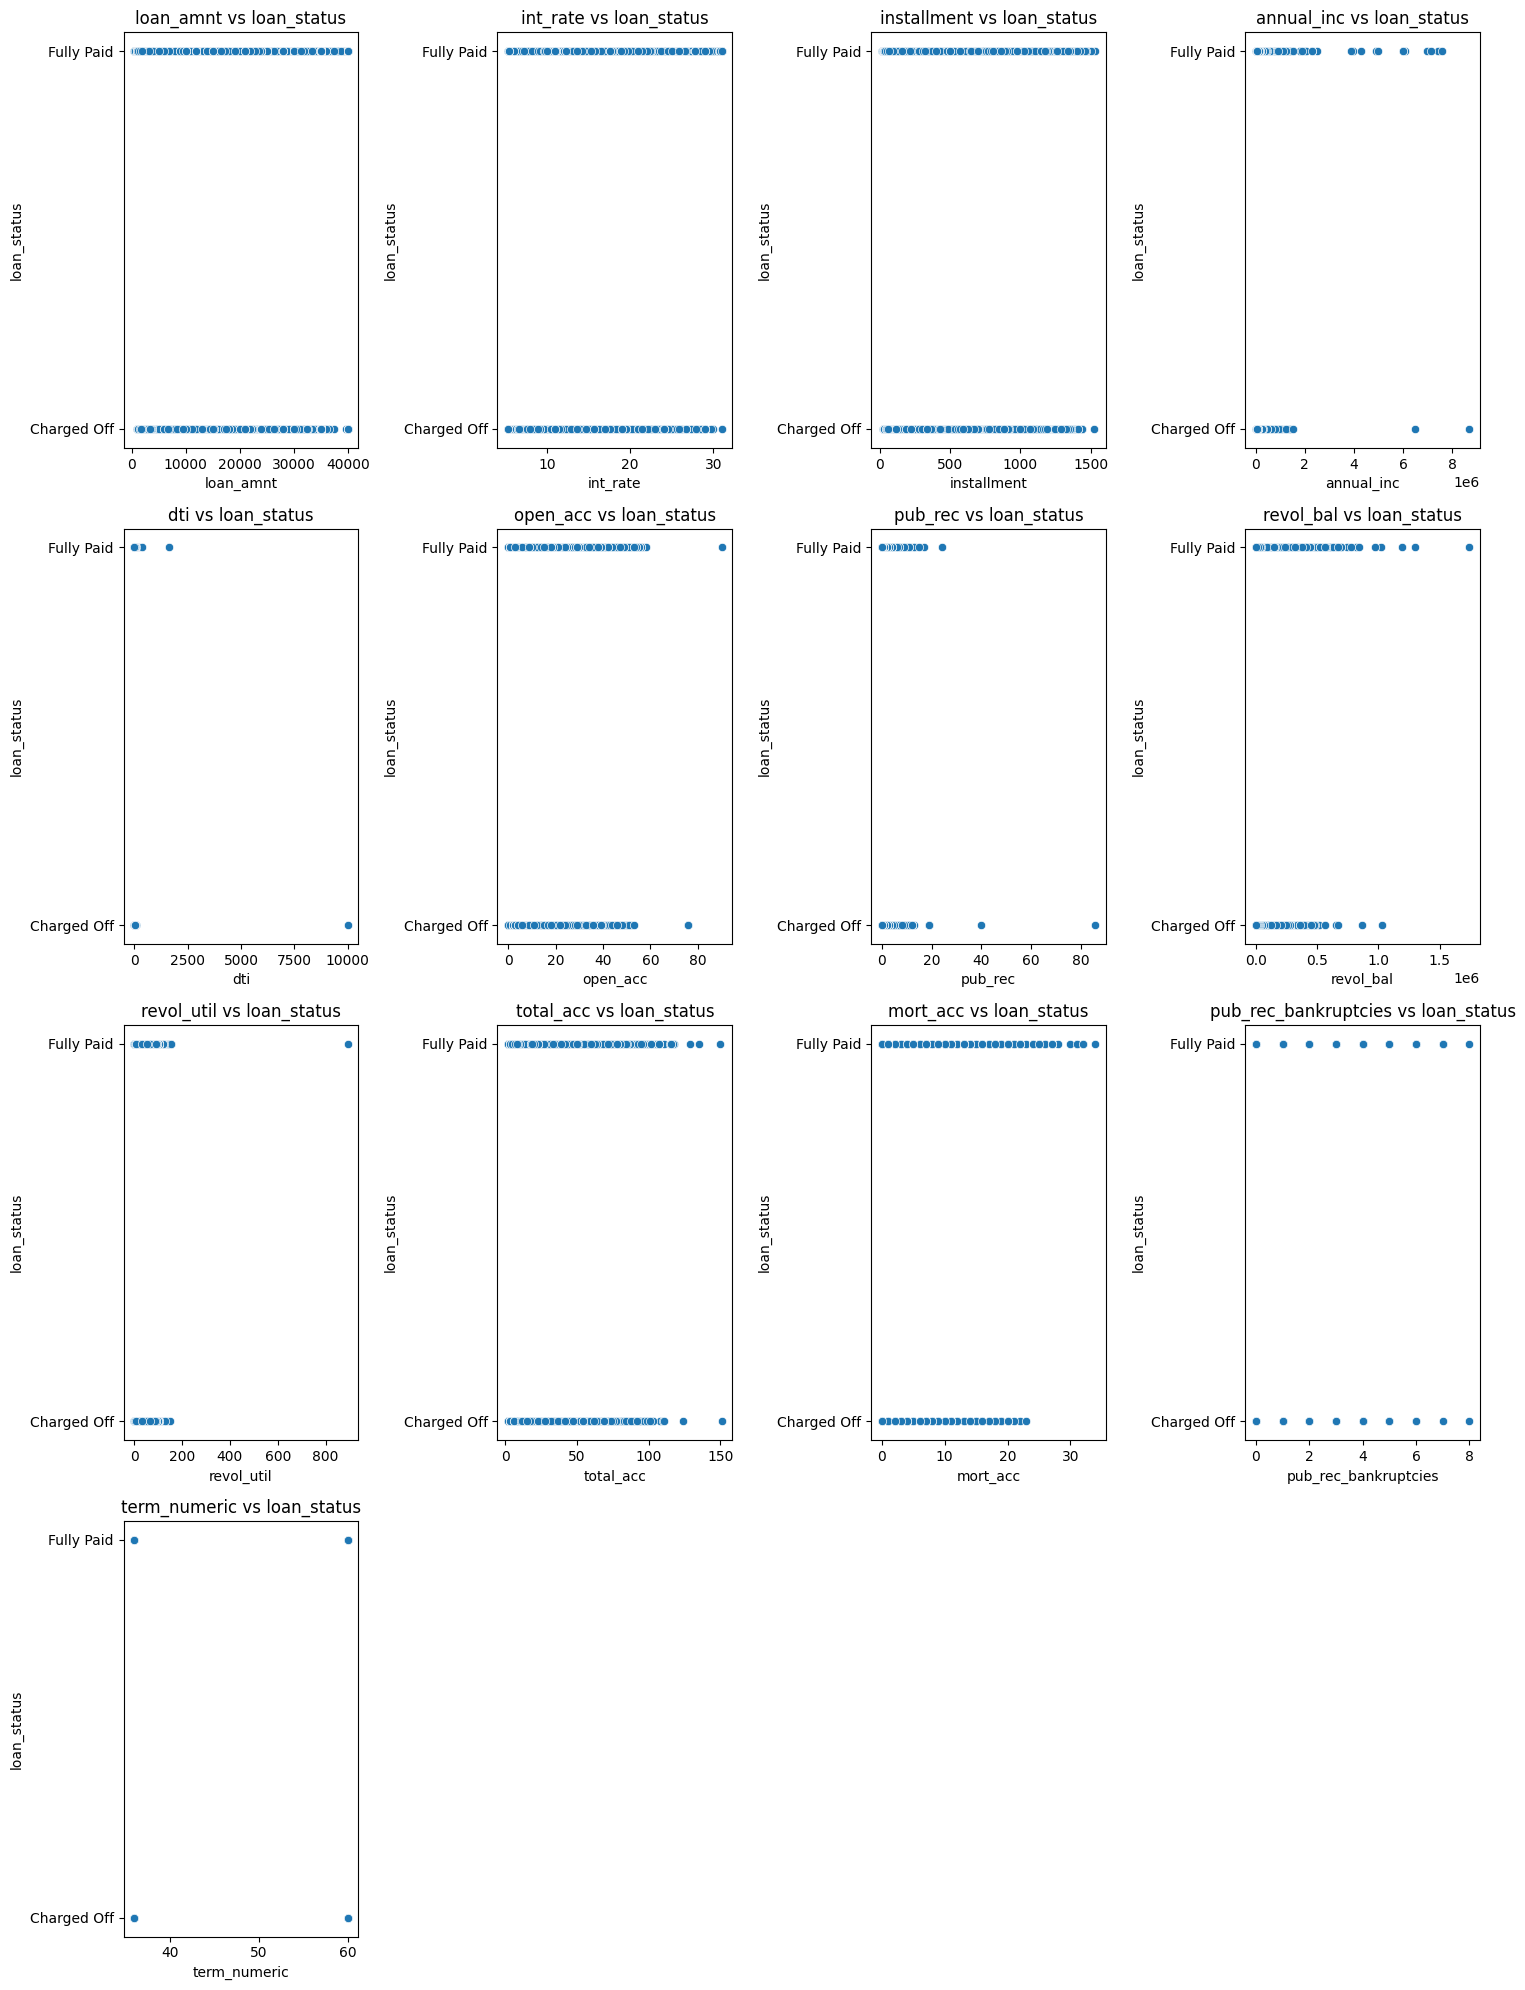

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the total number of numeric columns
total_number_num_columns = len(df.select_dtypes(exclude='object').columns)

# Define the number of columns per row
columns_per_row = 4

# Calculate the number of rows required
rows = (total_number_num_columns + columns_per_row - 1) // columns_per_row

# Create subplots with the required number of rows and columns
fig, axes = plt.subplots(nrows=rows, ncols=columns_per_row, figsize=(15, 5 * rows))

# Flatten the axes array so that we can iterate over it in a single loop
axes = axes.flatten()

# Get numeric columns from the dataframe
numeric_cols = df.select_dtypes(exclude='object').columns

# Loop through each column and plot on the corresponding axis
for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=df, x=col, y='loan_status', ax=axes[i])
    axes[i].set_title(f'{col} vs loan_status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('loan_status')

# Remove any extra unused subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


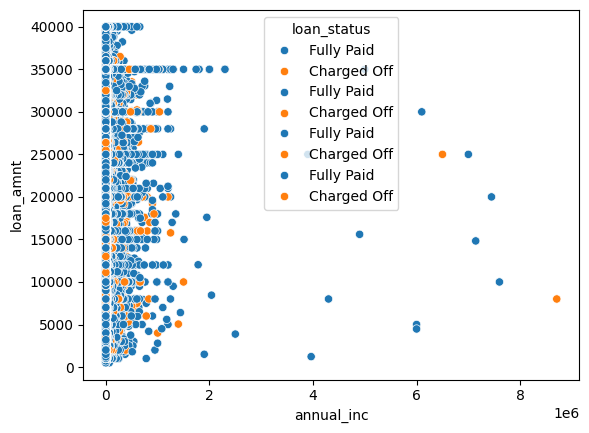

In [ ]:
for col in ['annual_inc','dti','revol_bal','revol_util']:
  sns.scatterplot(data=df,x=df[col], y=df['loan_amnt'],hue='loan_status')

Based on the above graphs,
there is not much difference in the behaviour across two classes of loan status for below list of features  -
1. loan amount
2. int_rate
3. installment
4. open_acc
5. pub_rec_bankruptcies
6. term
7. total_acc

Slight difference across the two groups:

1. total_acc
2. mort_acc
3. revol_util


Features that have siginificant difference across the two classes:
1. annual_inc
2. dti
3. pub_rec
4. revol_bal



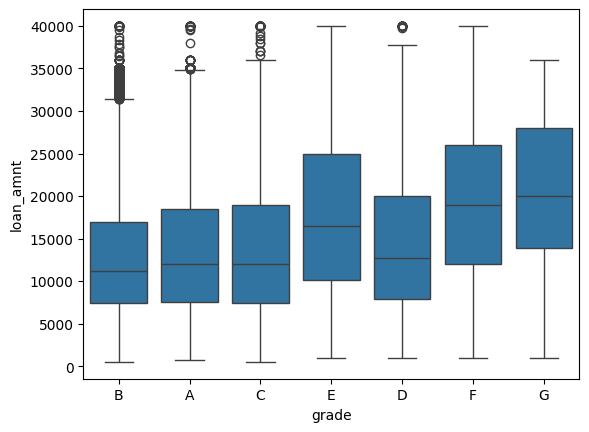

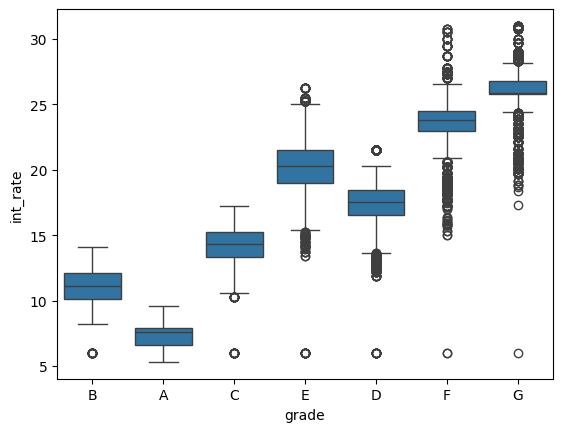

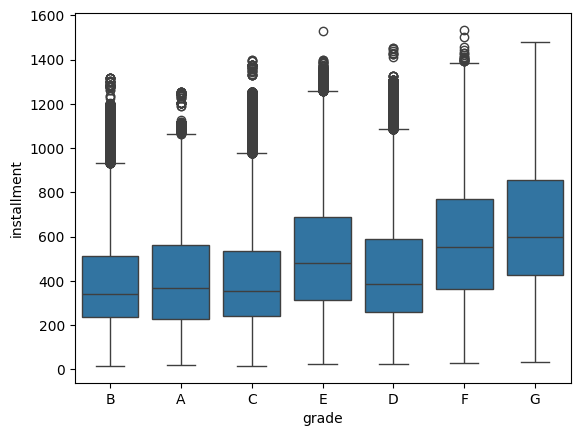

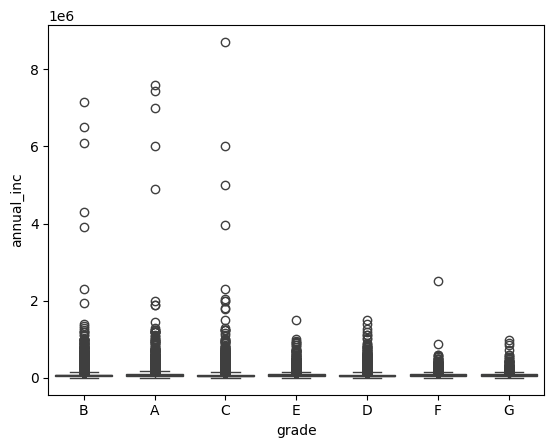

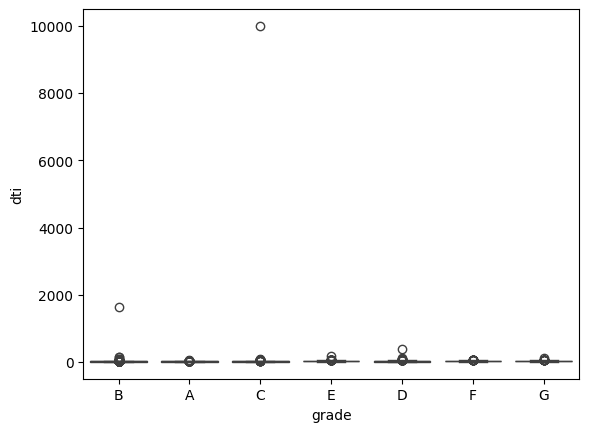

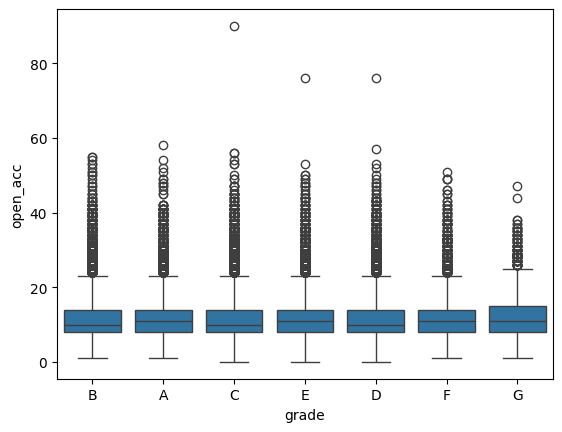

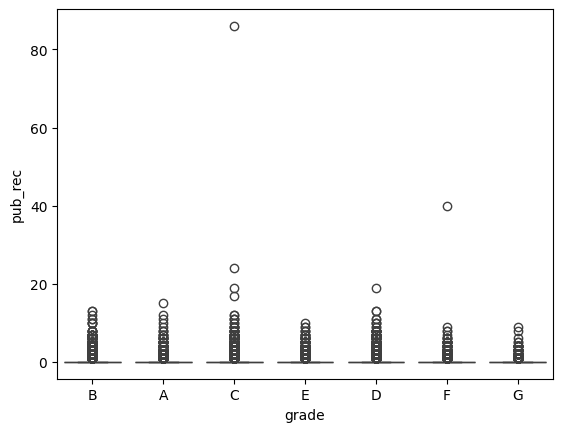

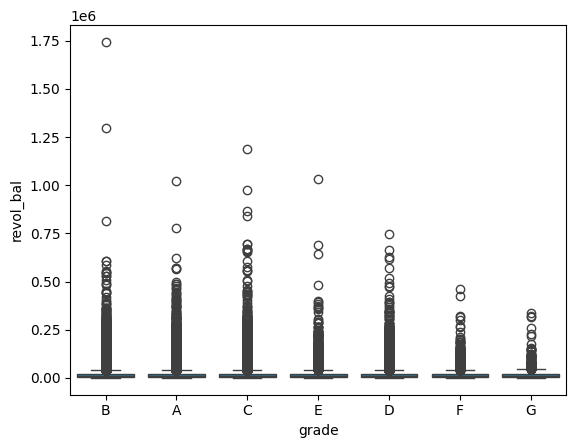

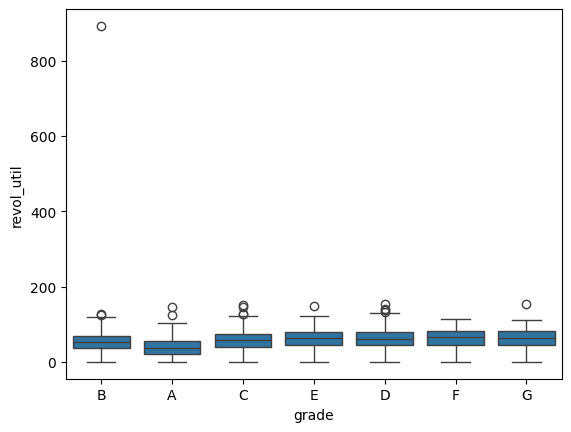

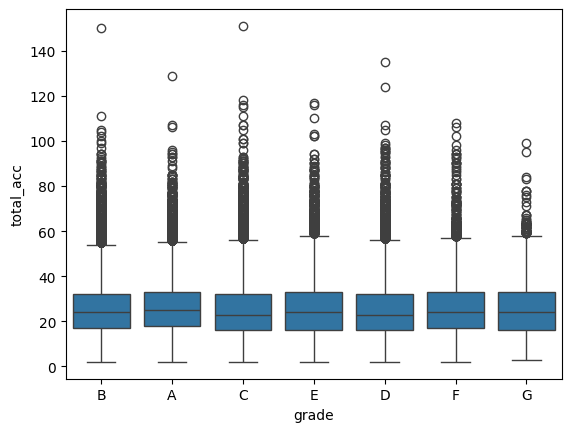

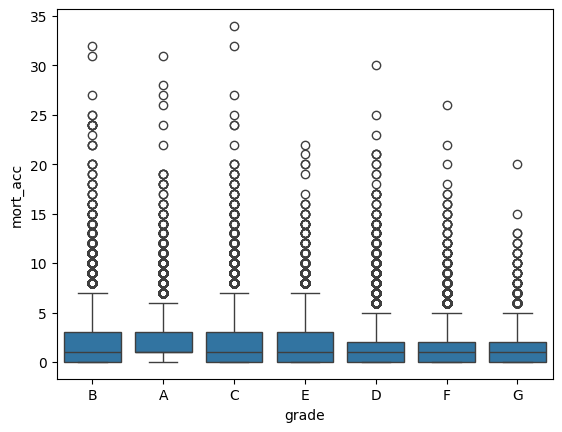

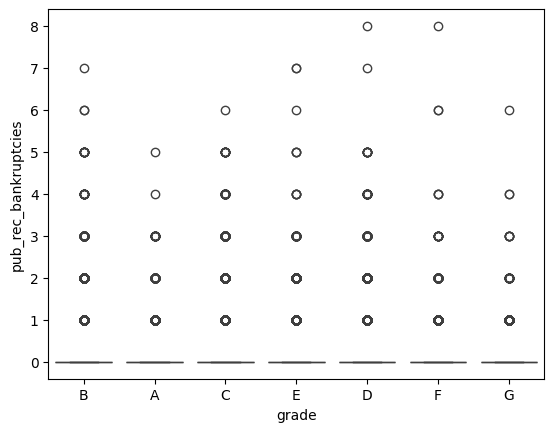

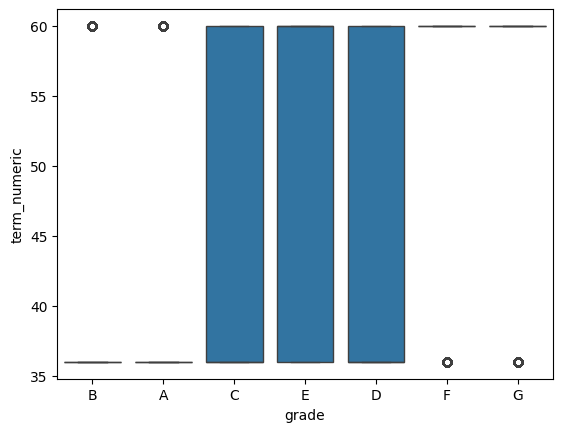

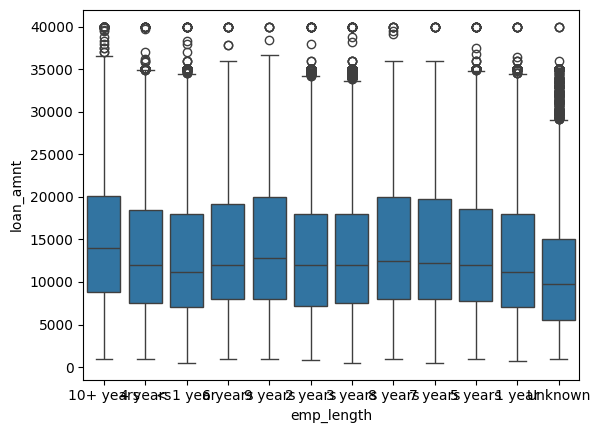

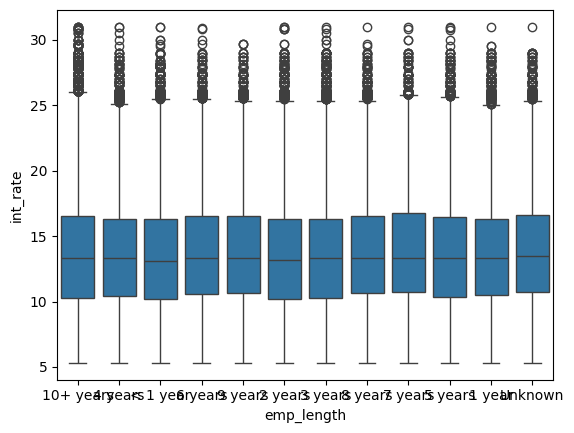

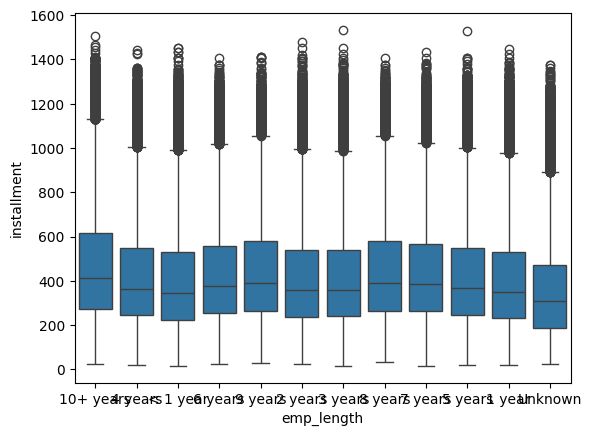

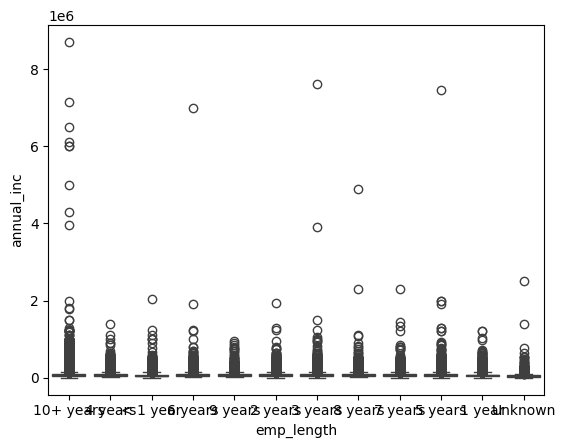

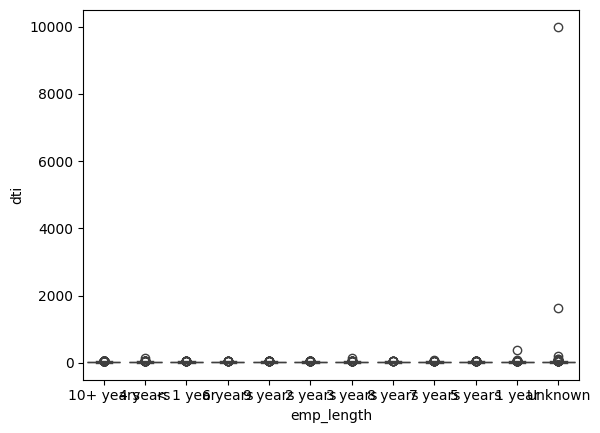

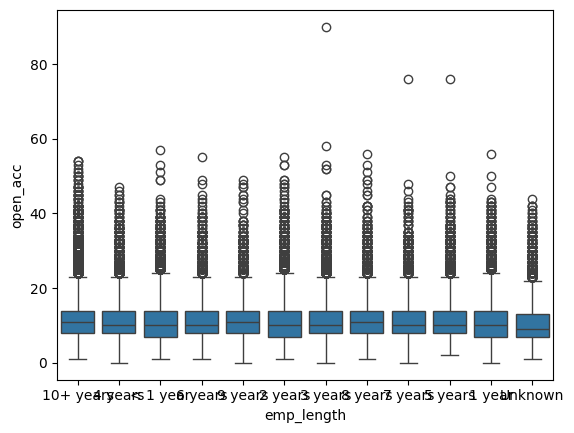

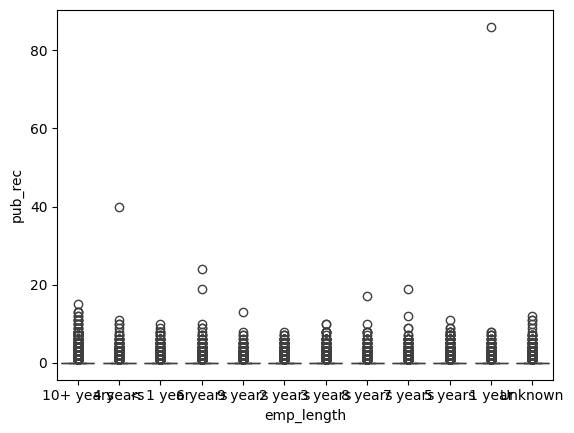

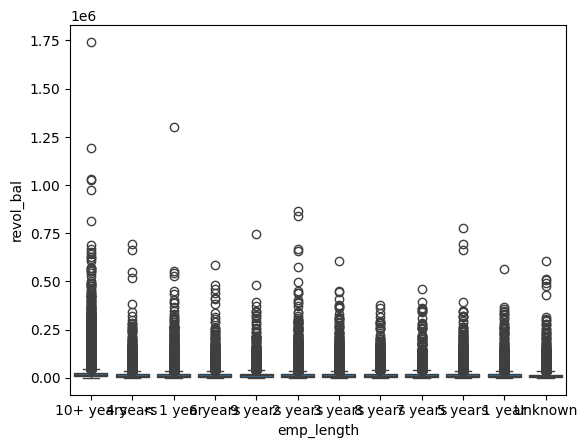

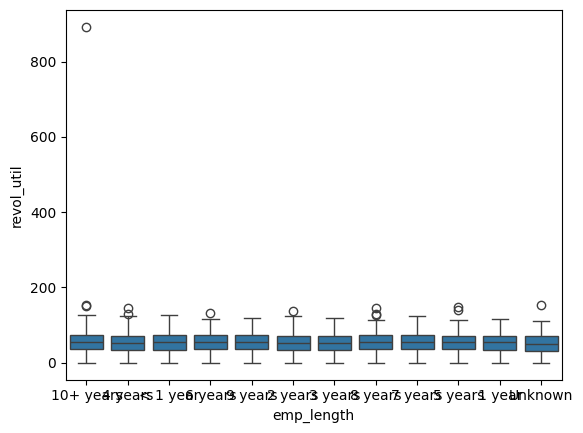

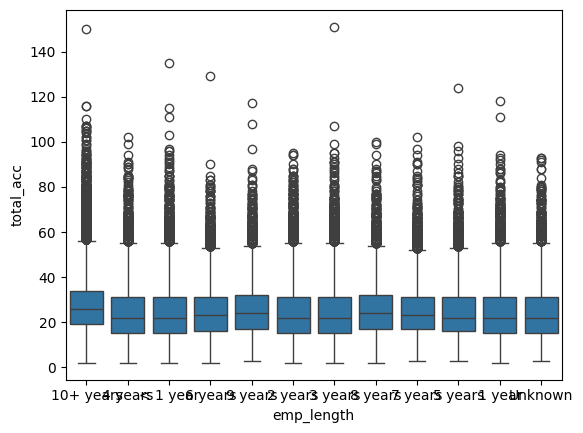

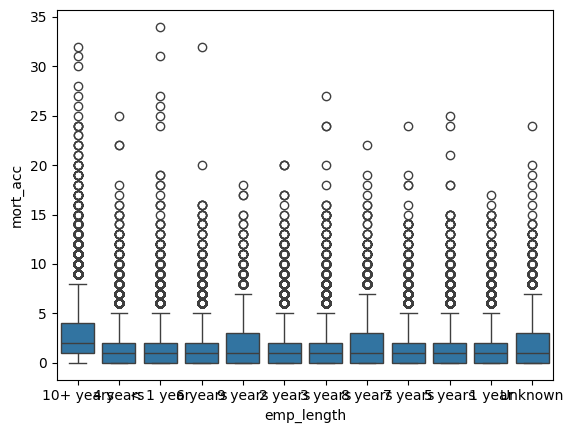

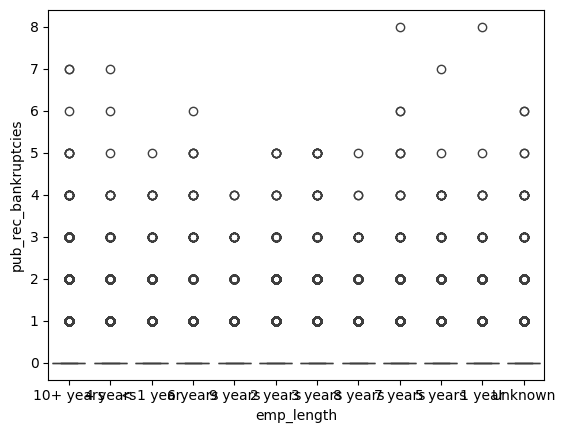

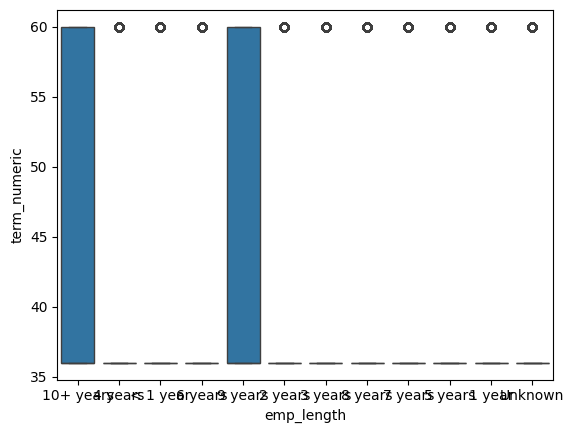

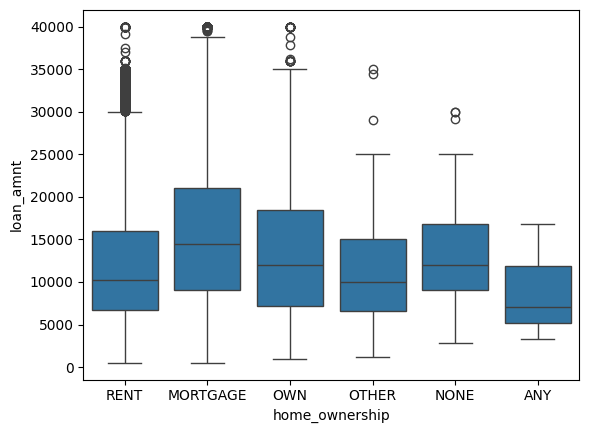

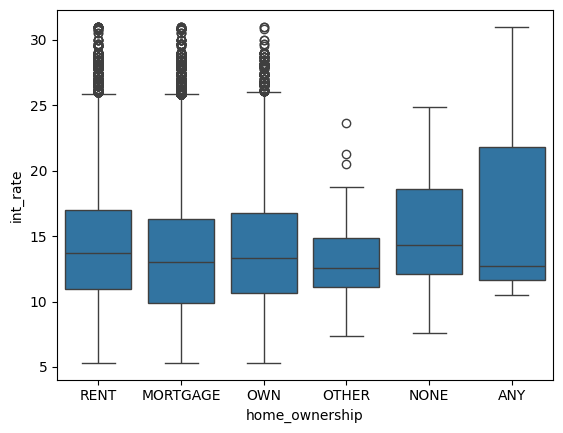

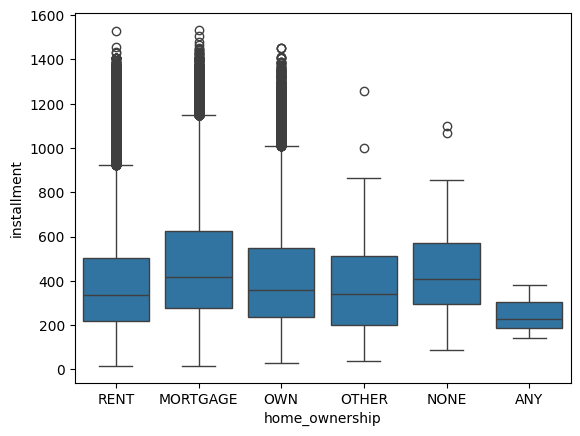

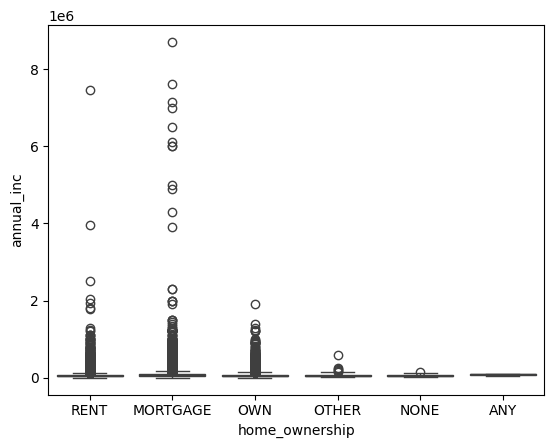

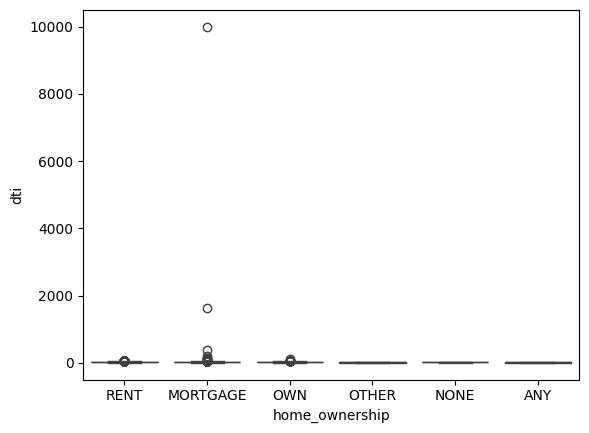

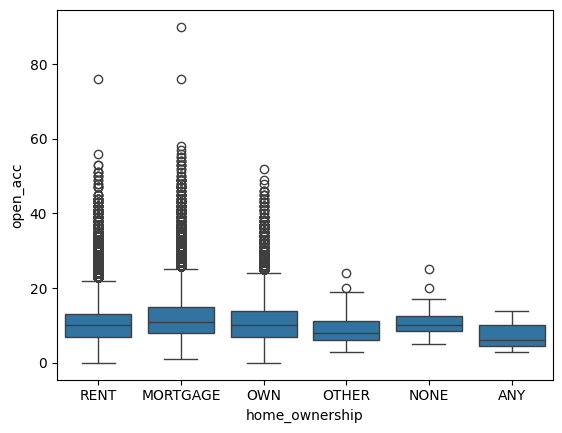

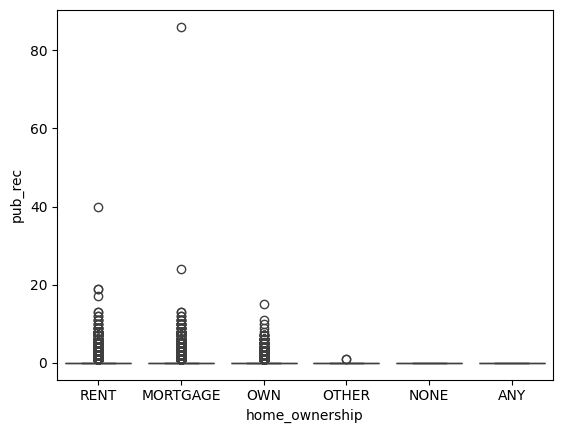

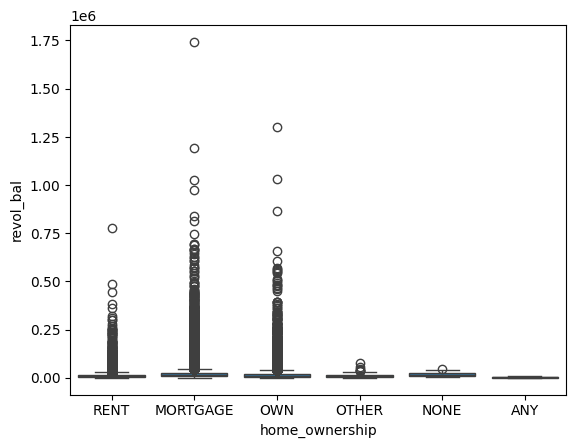

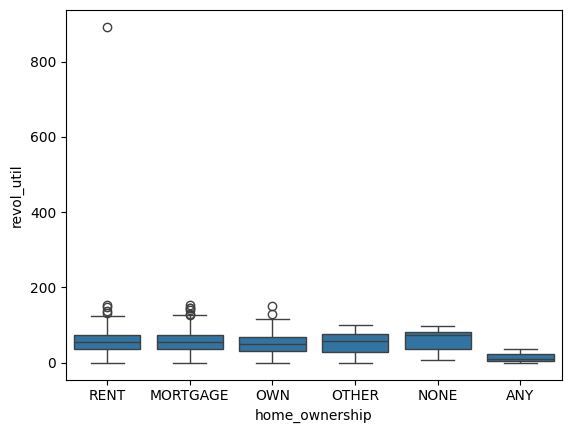

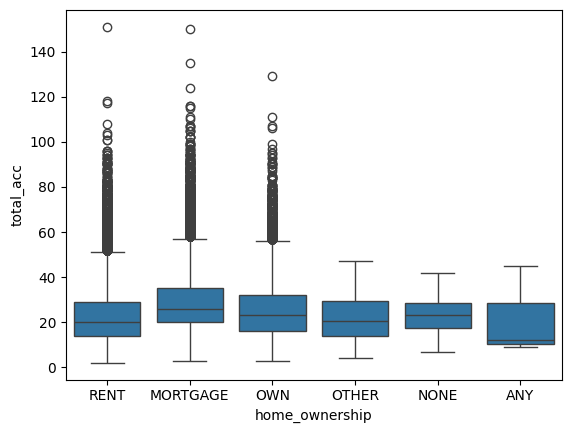

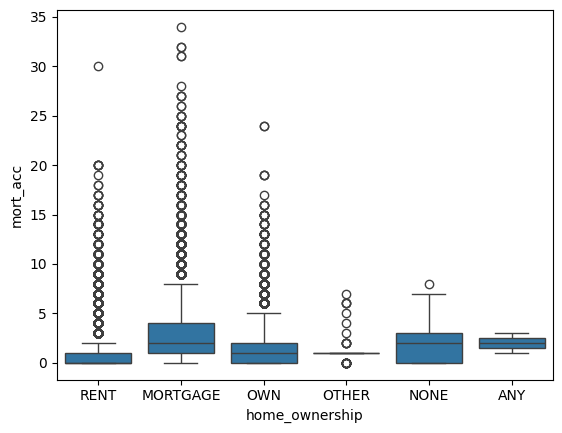

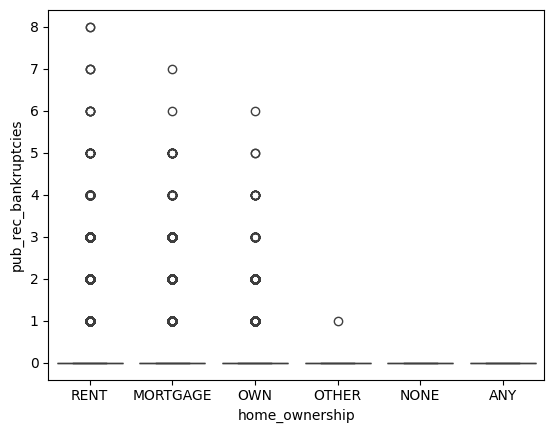

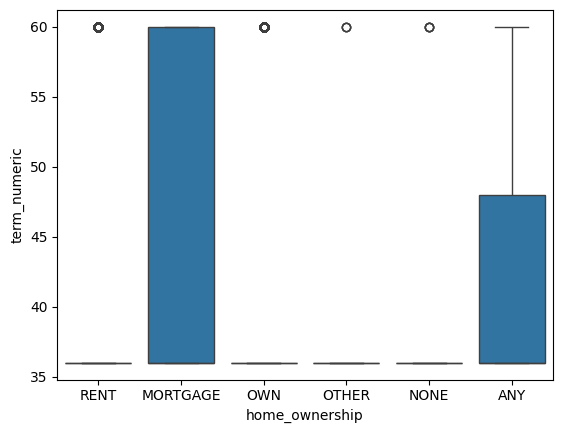

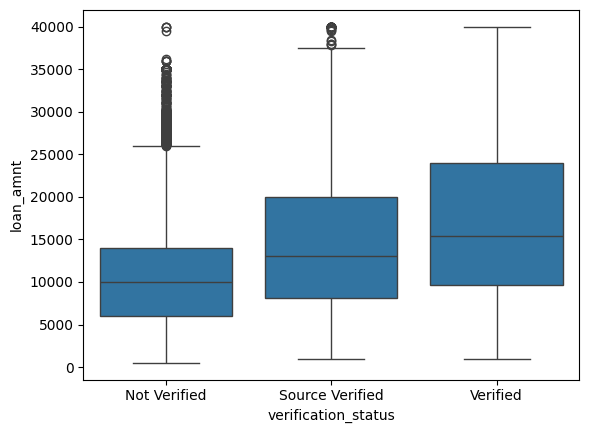

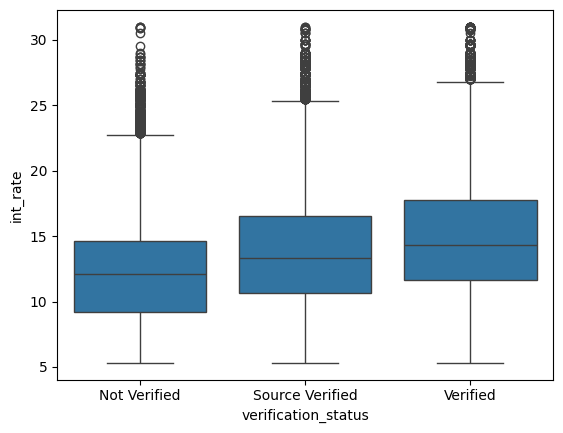

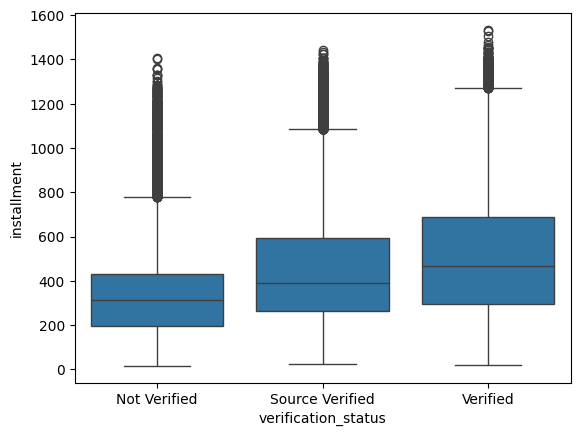

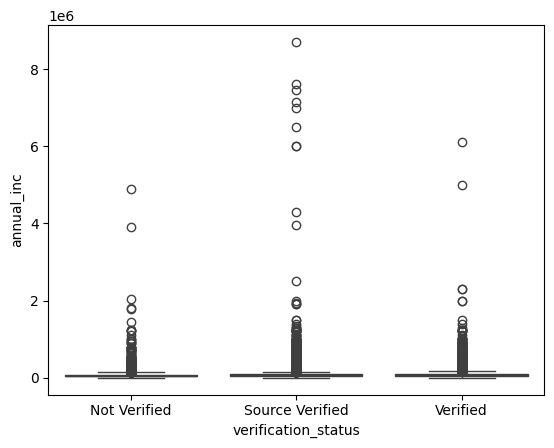

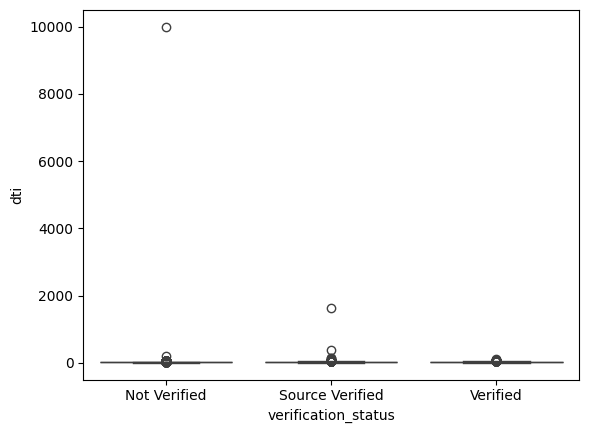

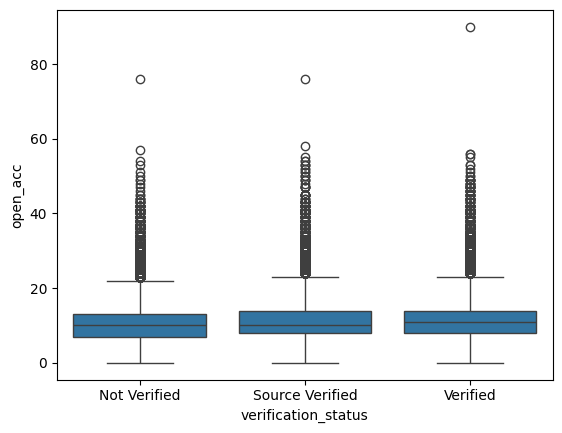

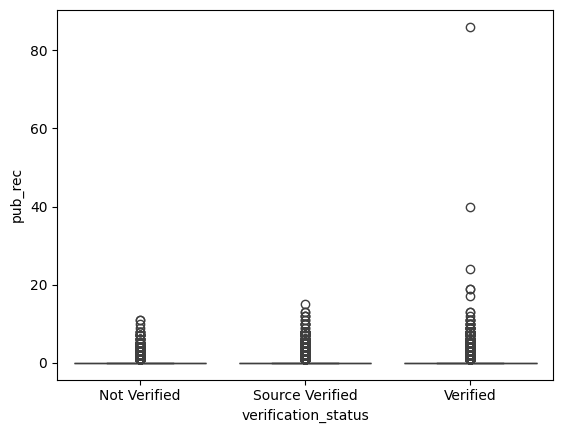

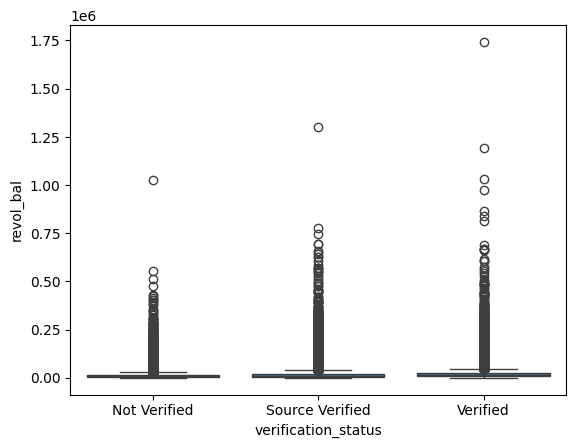

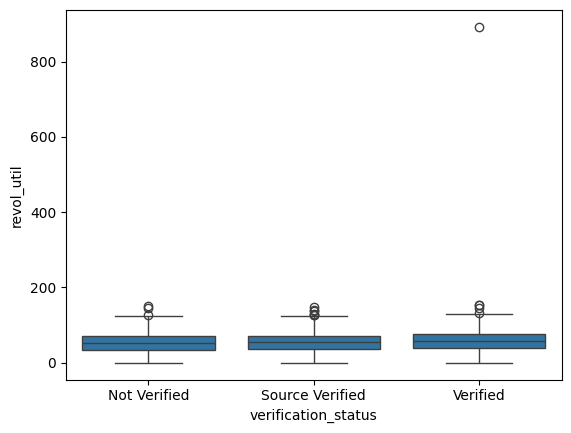

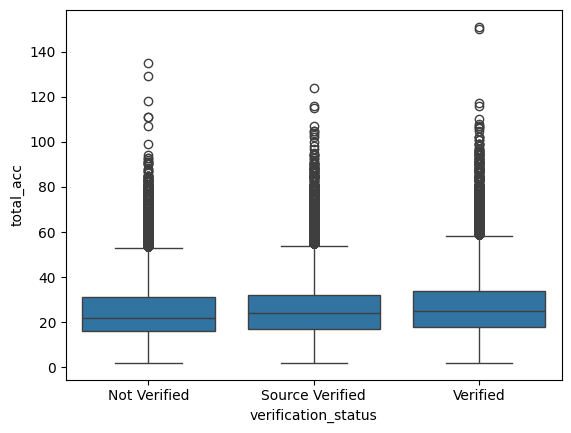

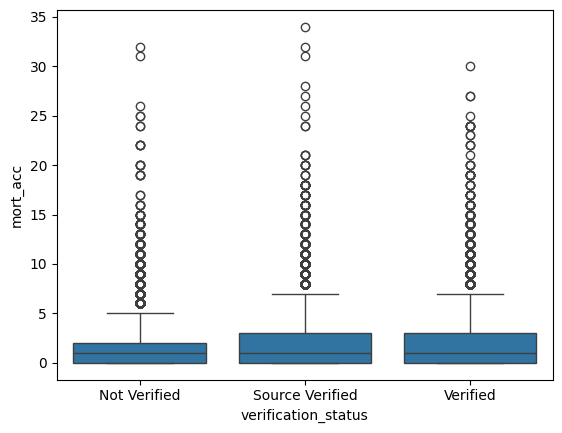

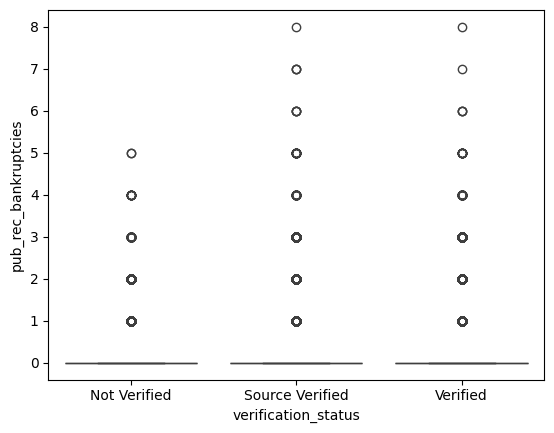

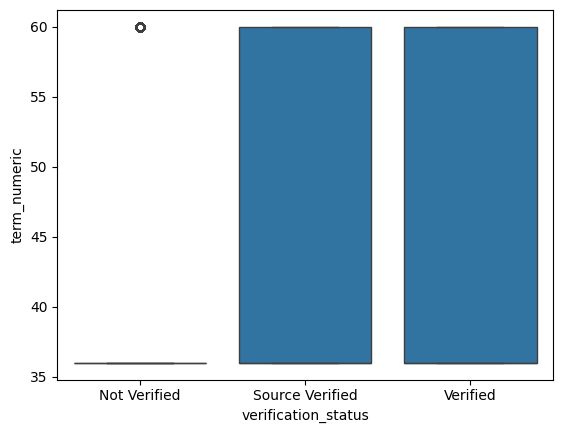

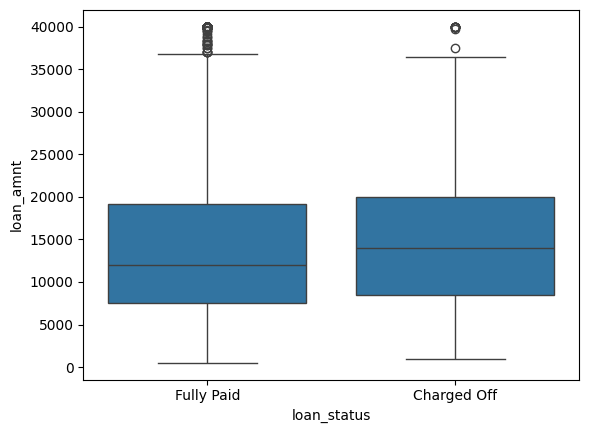

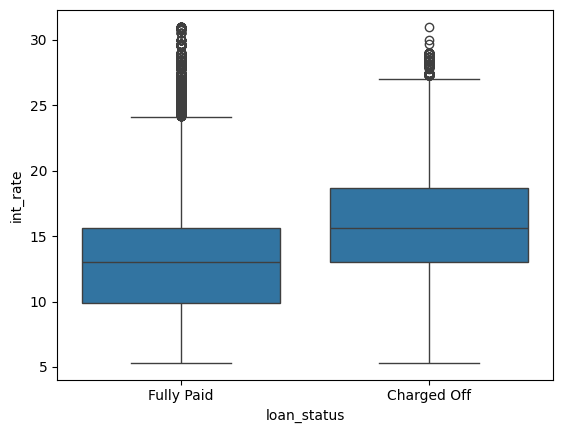

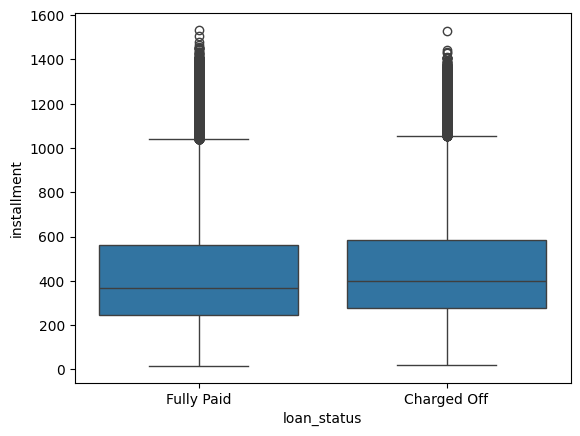

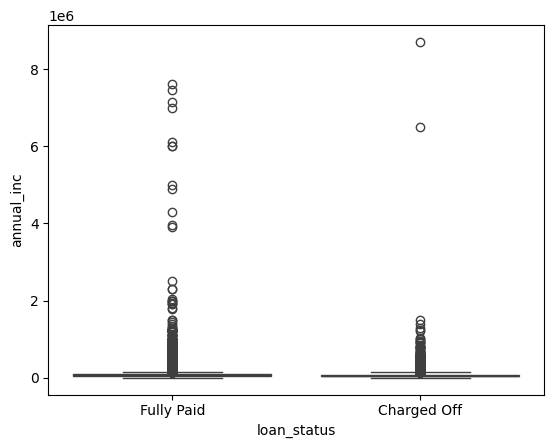

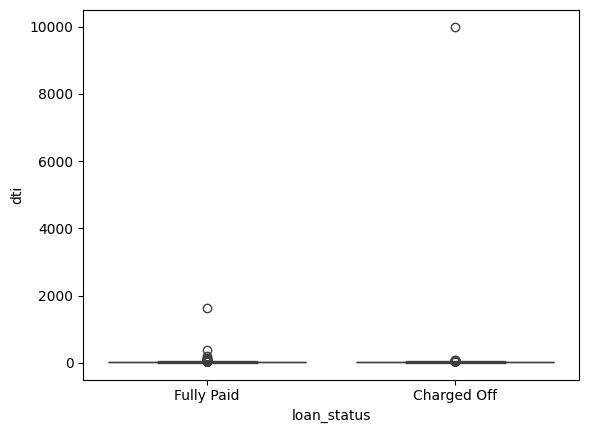

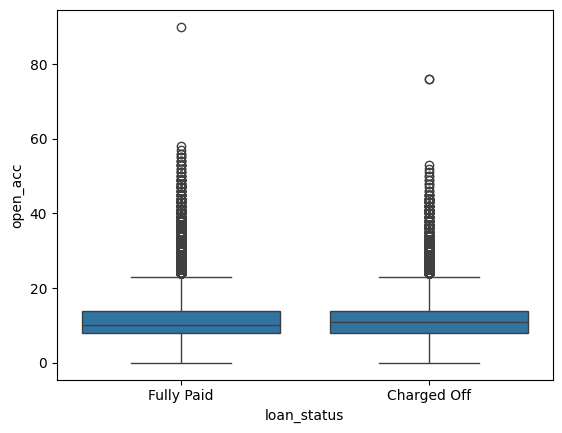

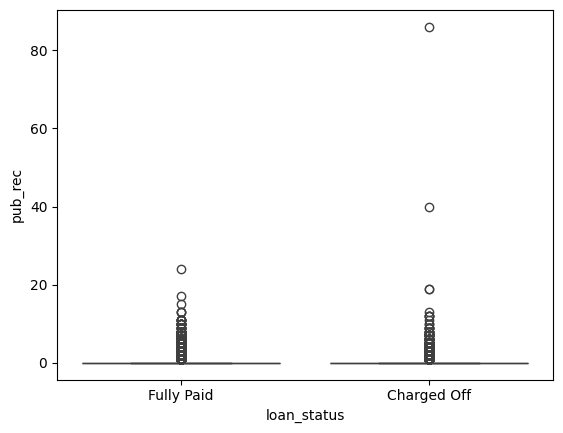

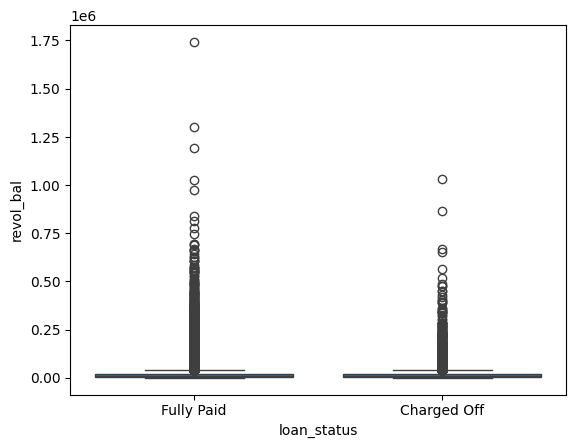

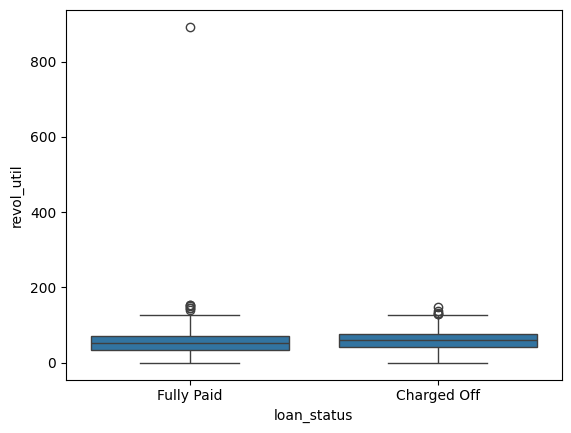

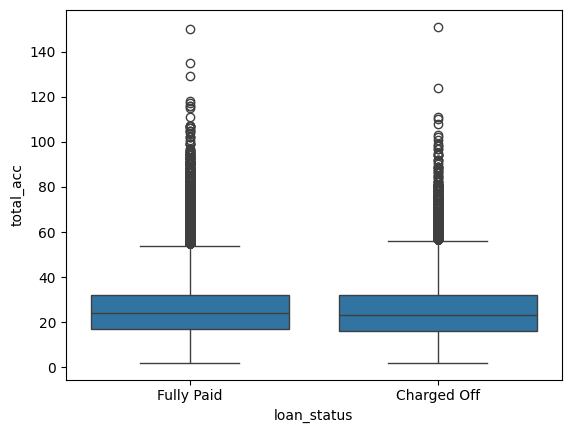

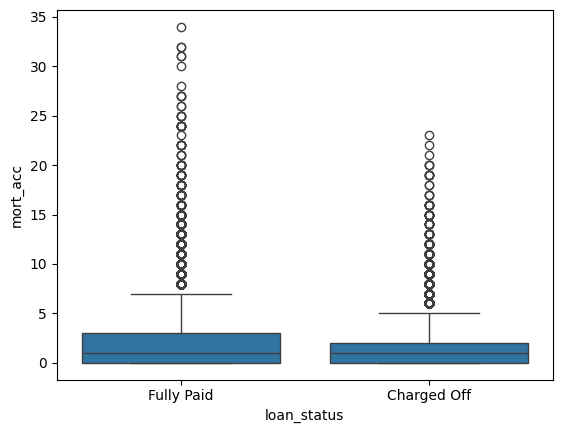

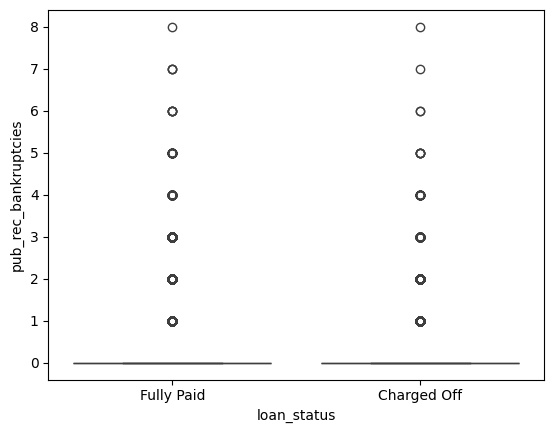

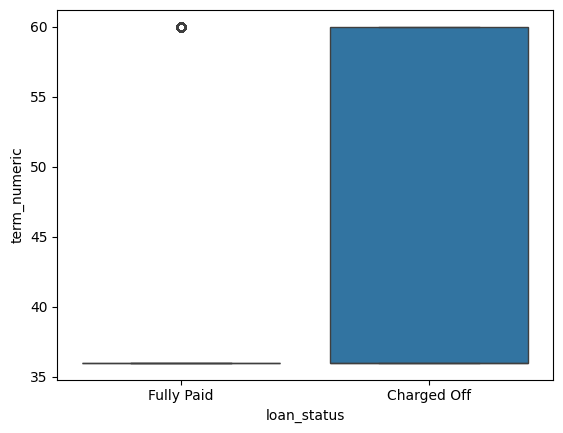

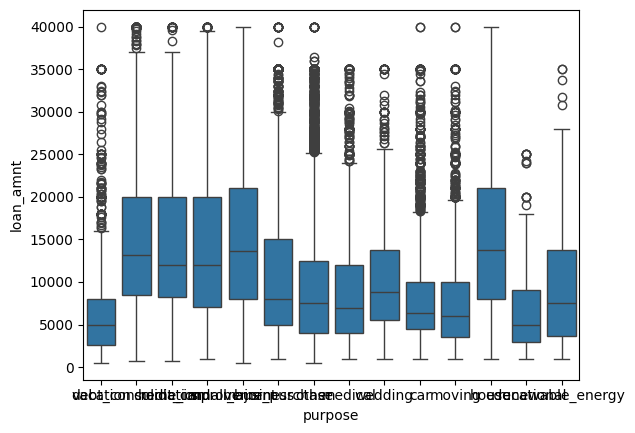

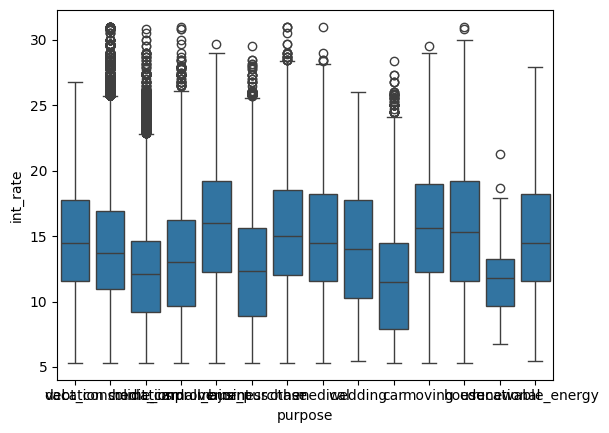

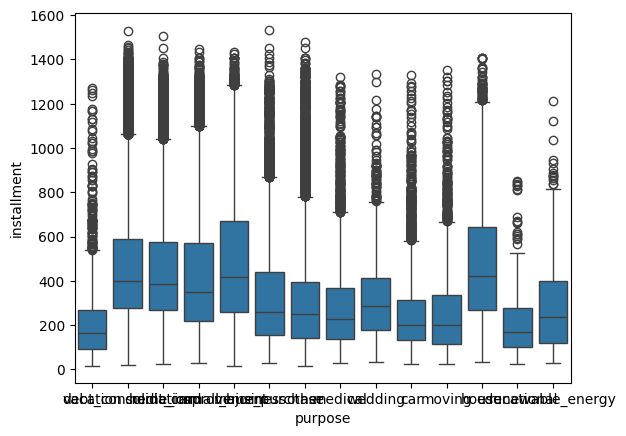

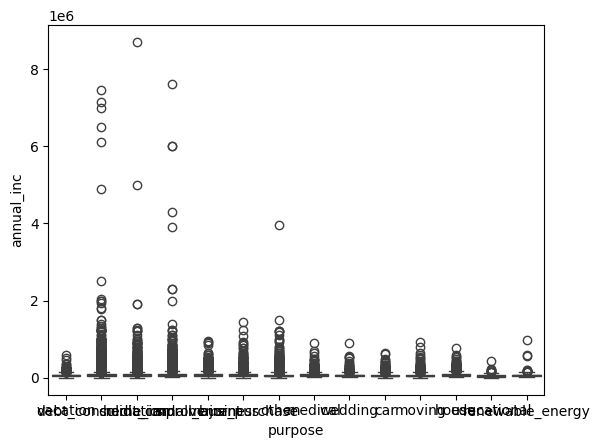

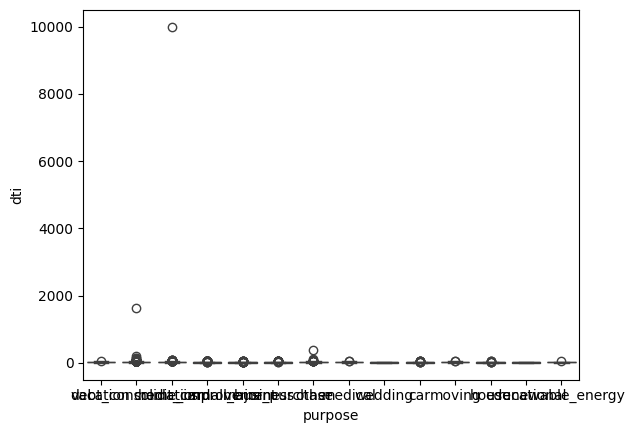

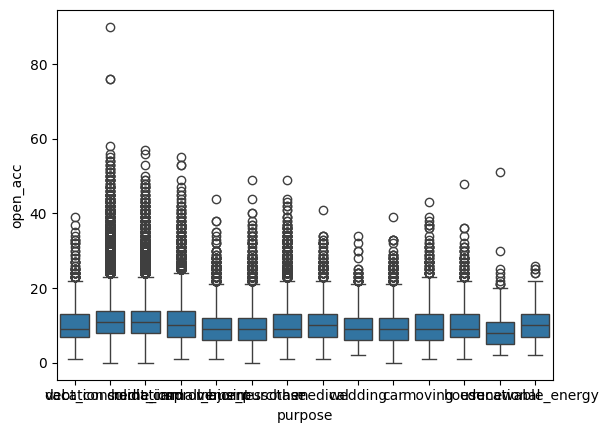

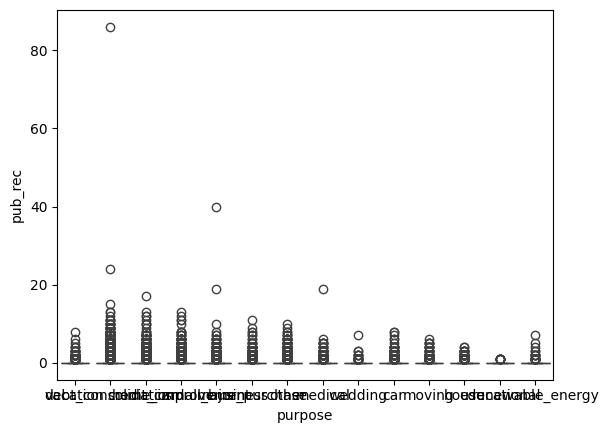

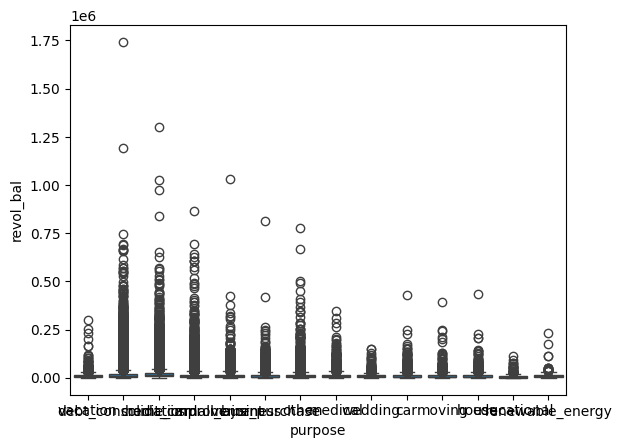

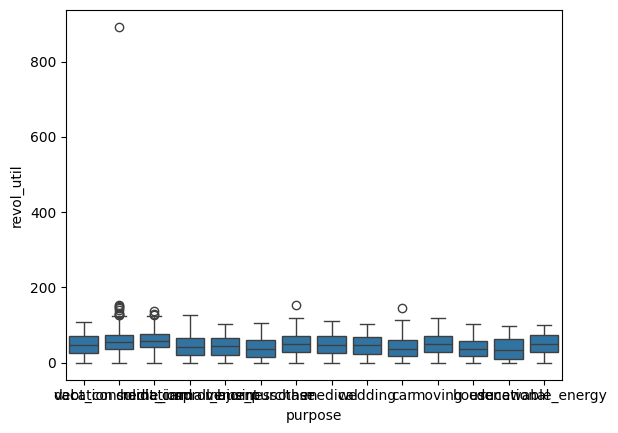

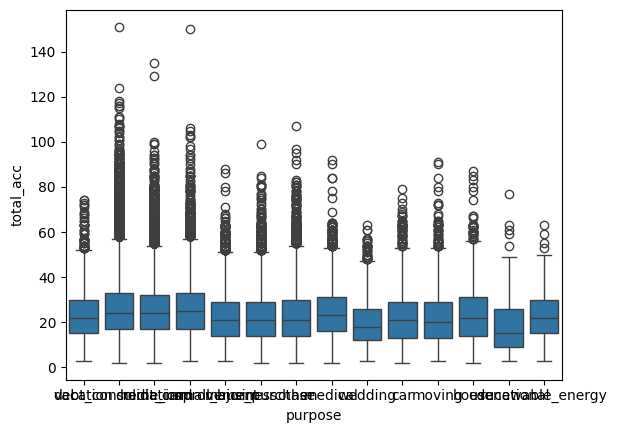

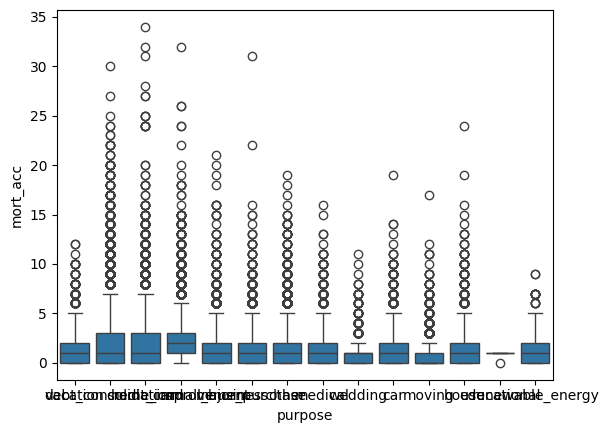

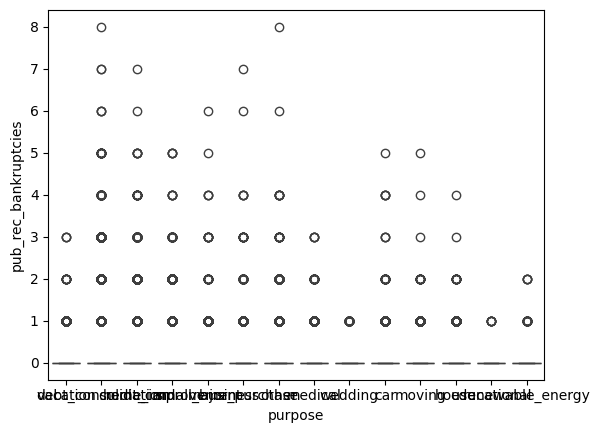

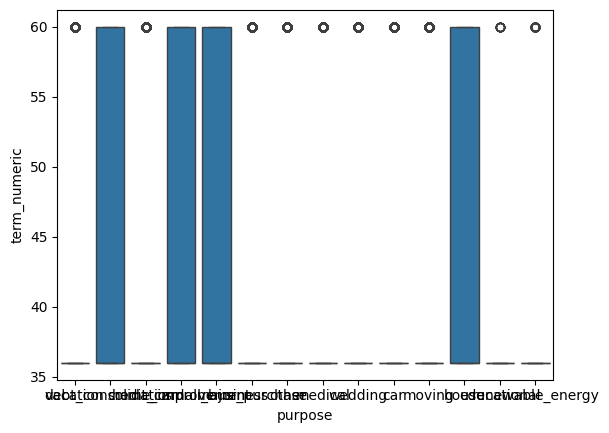

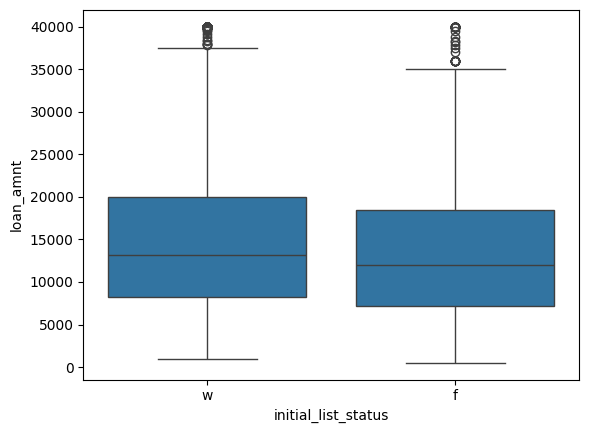

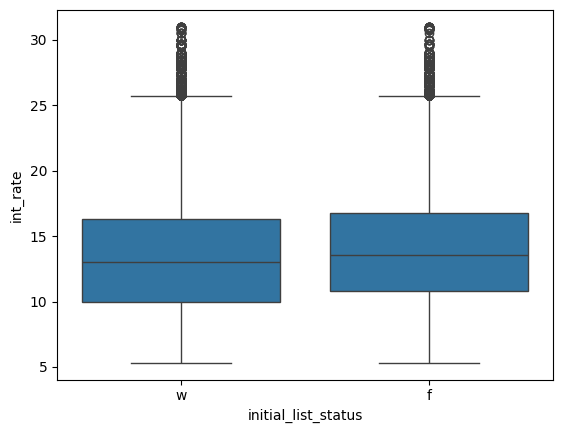

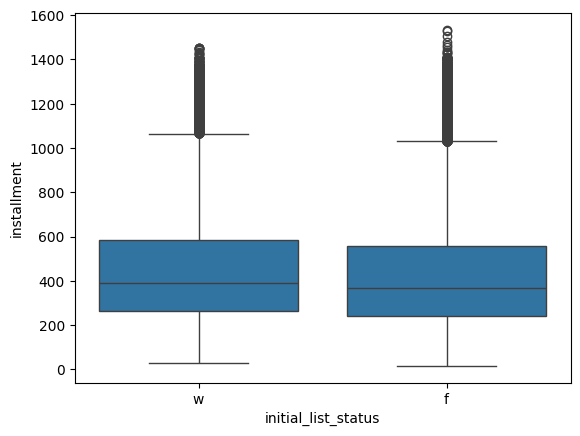

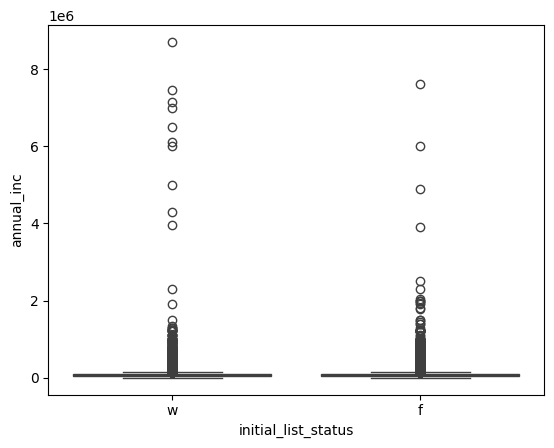

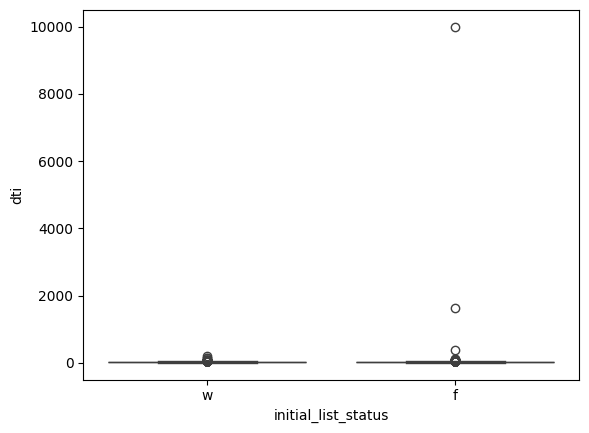

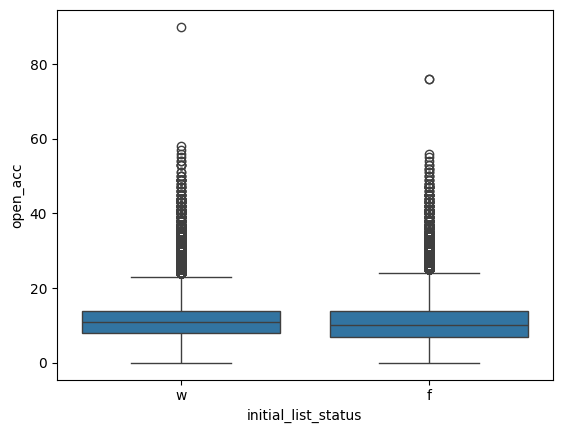

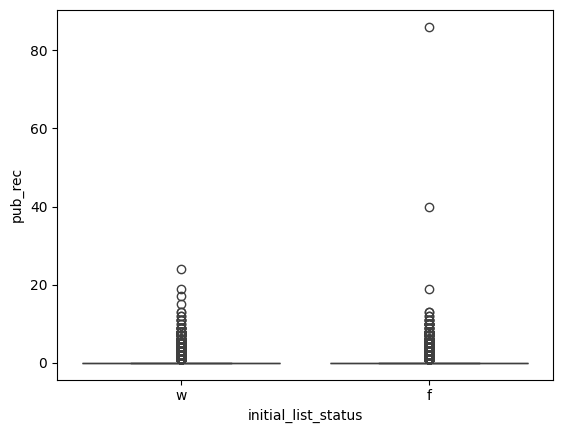

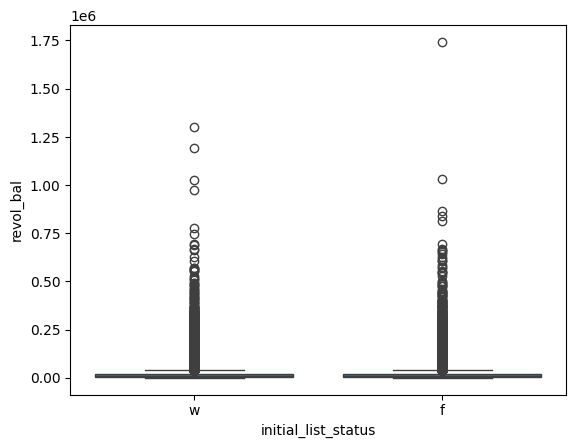

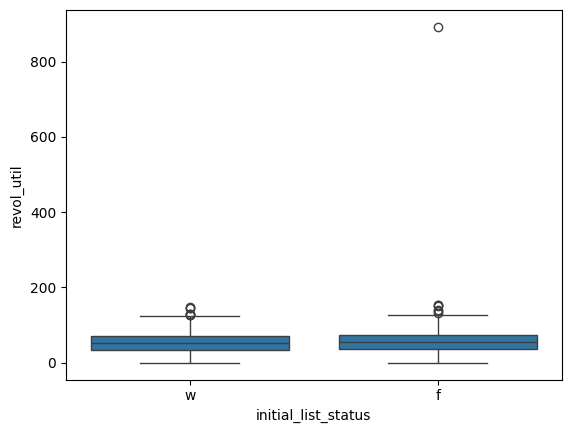

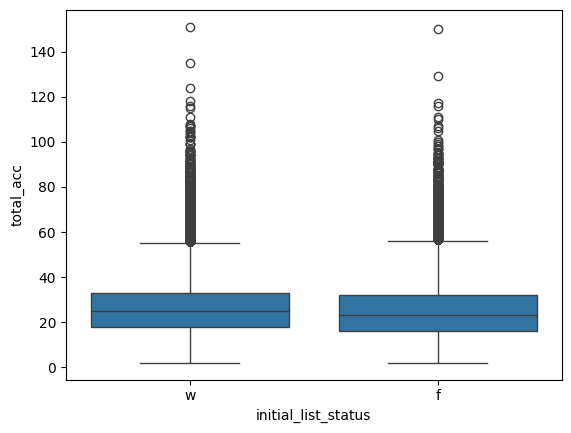

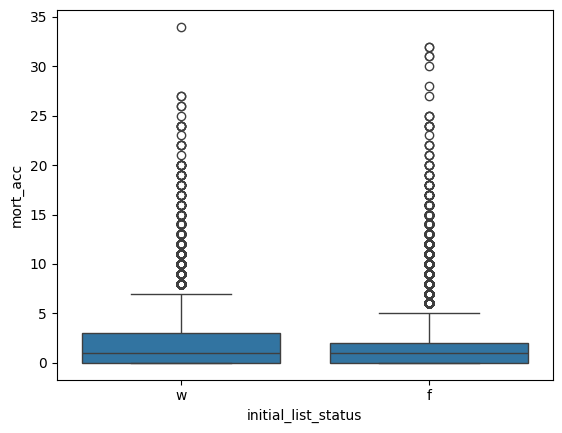

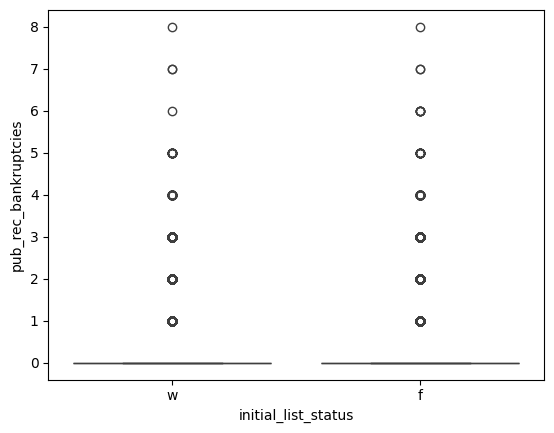

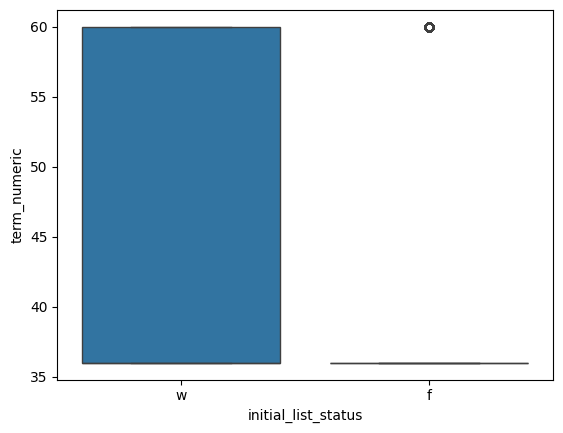

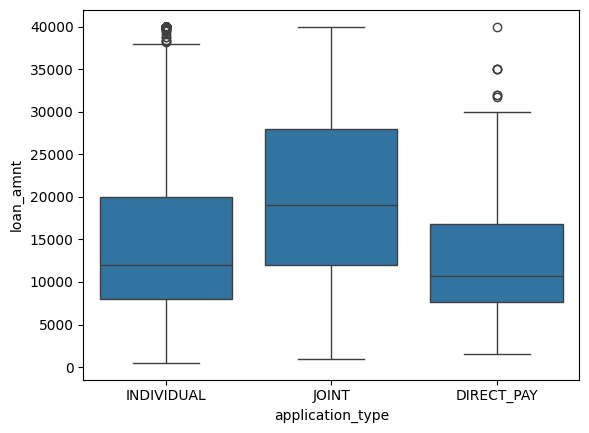

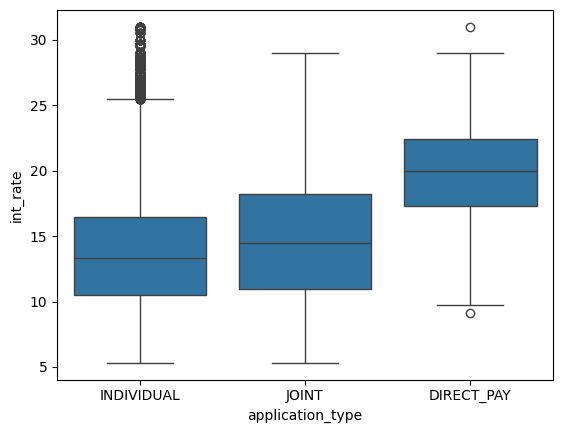

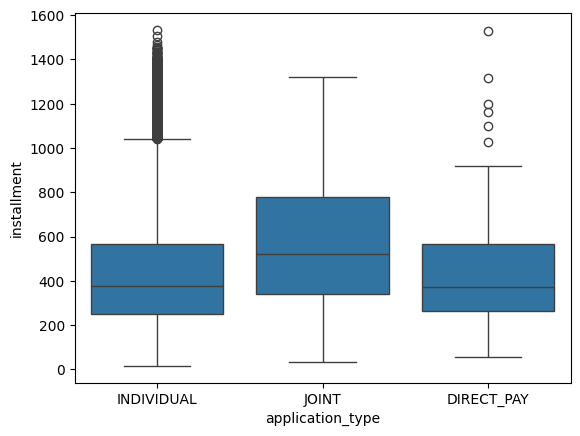

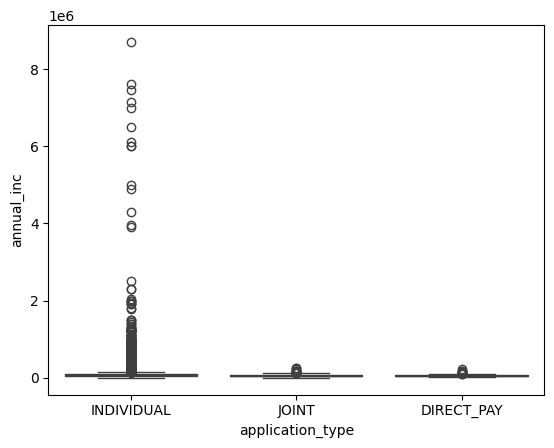

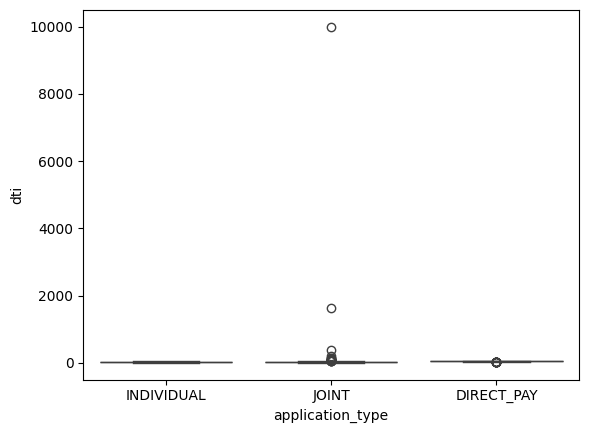

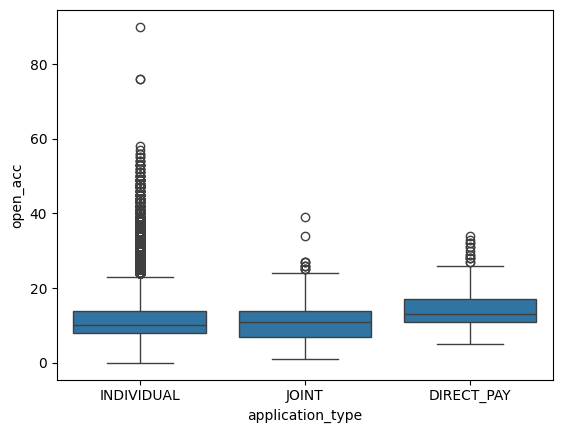

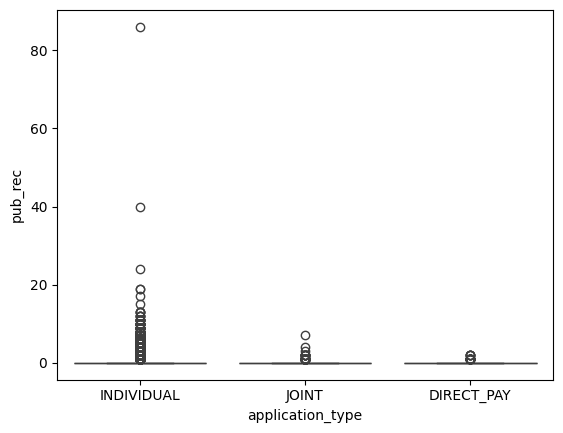

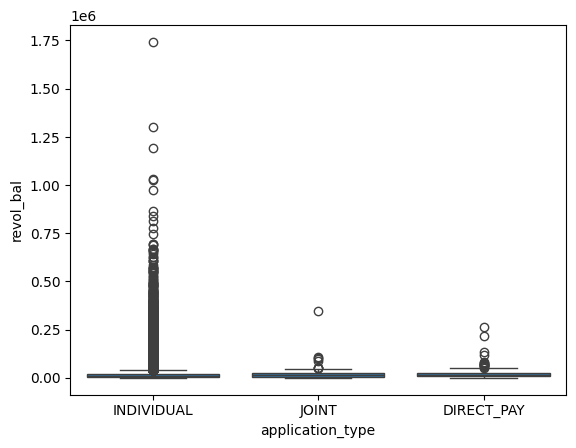

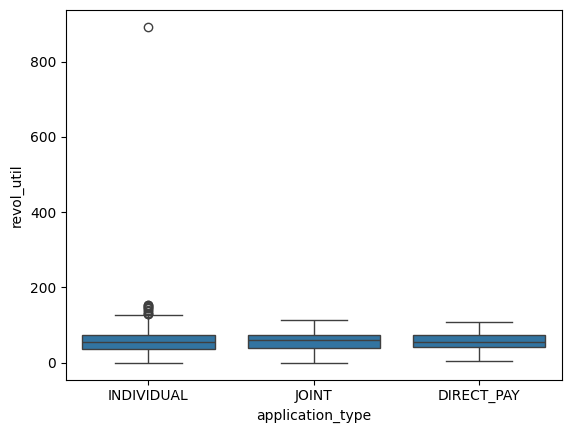

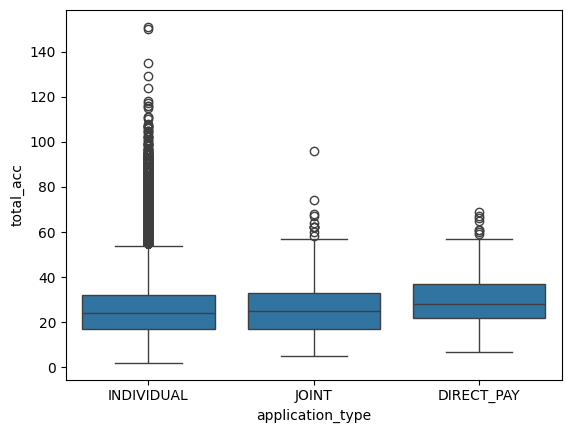

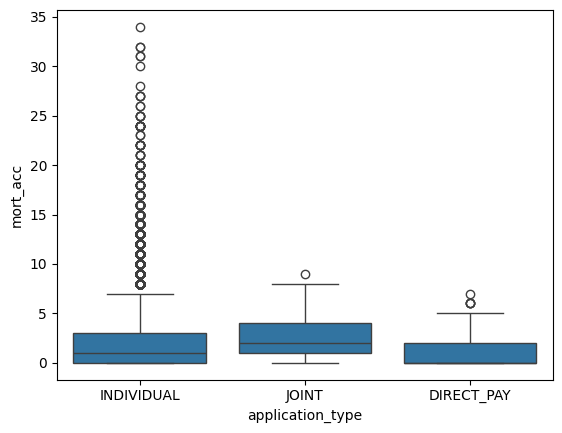

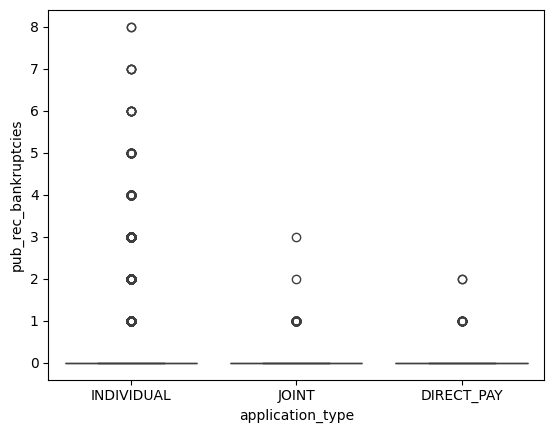

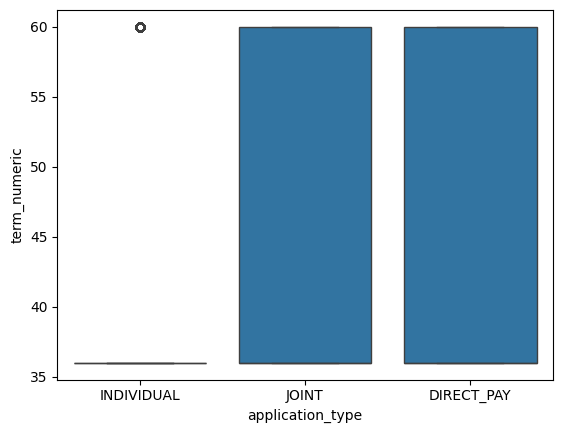

In [ ]:
for cat_col in df_new.columns:
  for num_col in df.select_dtypes(exclude='object').columns:
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.show()

1. Observations from BoxPlot: For grade B,A,C the loan amount has a lot of outliers (30,000 to 40,000)

2. Interest rate varies with grade and there are a lot of outliers in interest rates for higher grades - D,F,G

3. There is a lot of variations/outliers in the number of installments across grades
4. For grade B,A,C, the annual income is very high for some of the employees to whom the loans have been issued compared to grades D,F,G

5. for grade C, we have considerable number of outliers for derogatory public records which indicates higher chances of charged off

6. Borrowers who are paying rent for house accomodation or have their own home have higher number of outliers for larger loan amounts compared to the borrowers who have their houses on mortgage, they have higher range of loan amount but lesser number of outliers for higher loan amounts

7. Borrowers with higher annual income have their houses on mortgage with a lot of outliers for annual income spanning from

8. Debt to income ratio for some of the loan borrowers is really high and they might have very high chances of getting chargedoff, for around 24%, debt is more than 25 times their income, they are for joint appliication types

9. for verified income, the range of loan amount is higher

10. Annual income plays an important role in loan is being paid

11. Interest rate is dependent on the type of loan application with being higher for direct pay application

12. Loan amount is higher for joint type of loan applications









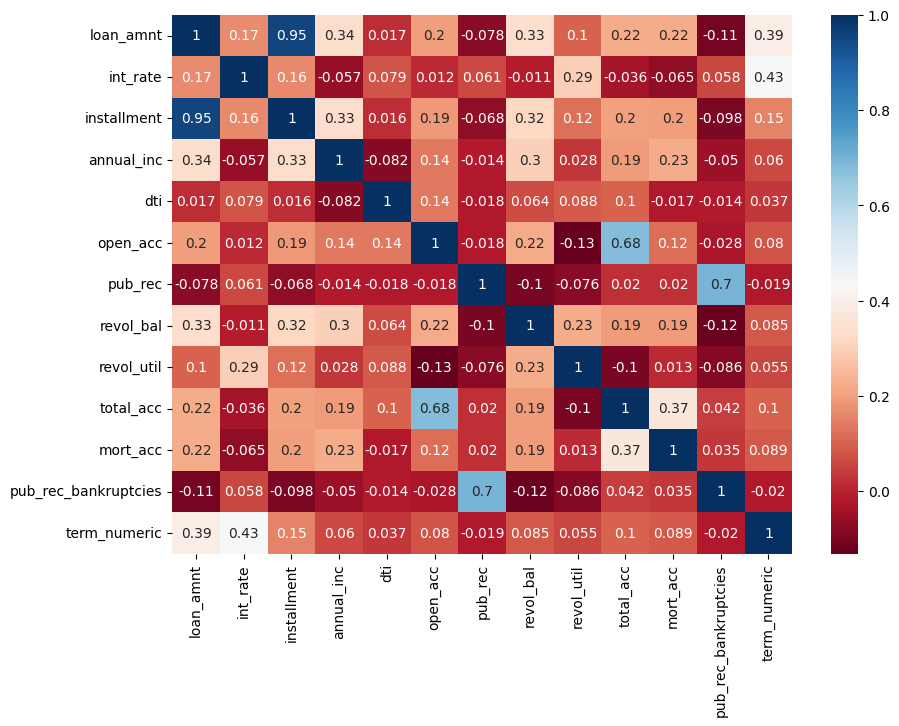

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True,cmap='RdBu')
plt.show()

1. Loan amount and installment are highly correlated,we can remove one of them

2. pub_rec and pub_rec_bankruptcies are positively correlated.

4. total_Account and open accounts are highly positively correlated as per the usual context





In [ ]:
(df[df['application_type'] == 'DIRECT_PAY']['loan_amnt'].sum())*100/df['loan_amnt'].sum()

0.06564602980171957

In [ ]:
df.groupby('application_type')['loan_amnt'].sum()

application_type
DIRECT_PAY    3.669300e+06
INDIVIDUAL    5.577432e+09
JOINT         8.422250e+06
Name: loan_amnt, dtype: float64

In [ ]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

# **FEATURE ENGINEERING**

In [ ]:
df.dtypes

loan_amnt               float64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
term_numeric              int64
dtype: object

In [ ]:
df['address_pincode'] = df['address'].apply(lambda x: x[-5:])

In [ ]:
df['address_pincode']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address_pincode, Length: 396030, dtype: object

In [ ]:
df1 = df.copy()

In [ ]:
# import requests

# def get_location_by_zipcode(zipcode):
#     # Zippopotam API endpoint URL
#     url = f"https://api.zippopotam.us/us/{zipcode}"

#     # Make GET request to the API
#     response = requests.get(url)

#     if response.status_code == 200:
#         data = response.json()
#         city = data['places'][0]['place name']
#         state = data['places'][0]['state']
#         return city, state
#     else:
#         return None, None

# df1[['place', 'city']] = df1['address_pincode'].apply(lambda x: pd.Series(get_location_by_zipcode(x)))


In [ ]:
# 1. Pub_rec
# 2. Mort_acc
# 3. Pub_rec_bankruptcies


In [ ]:
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df.drop(['pub_rec','mort_acc','pub_rec_bankruptcies'],axis=1,inplace=True)

In [ ]:
df.select_dtypes(exclude='object')

loan_amnt  int_rate  installment  annual_inc    dti  open_acc  \
0         10000.0     11.44       329.48    117000.0  26.24      16.0   
1          8000.0     11.99       265.68     65000.0  22.05      17.0   
2         15600.0     10.49       506.97     43057.0  12.79      13.0   
3          7200.0      6.49       220.65     54000.0   2.60       6.0   
4         24375.0     17.27       609.33     55000.0  33.95      13.0   
...           ...       ...          ...         ...    ...       ...   
396025    10000.0     10.99       217.38     40000.0  15.63       6.0   
396026    21000.0     12.29       700.42    110000.0  21.45       6.0   
396027     5000.0      9.99       161.32     56500.0  17.56      15.0   
396028    21000.0     15.31       503.02     64000.0  15.88       9.0   
396029     2000.0     13.61        67.98     42996.0   8.32       3.0   

        revol_bal  revol_util  total_acc  term_numeric  pub_rec_flag  \
0         36369.0        41.8       25.0            36             0   
1         20131.0        53.3       27.0            36             0   
2         11987.0        92.2       26.0            36             0   
3          5472.0        21.5       13.0            36             0   
4         24584.0        69.8       43.0            60             0   
...           ...         ...        ...           ...           ...   
396025     1990.0        34.3       23.0            60             0   
396026    43263.0        95.7        8.0            36             0   
396027    32704.0        66.9       23.0            36             0   
396028    15704.0        53.8       20.0            60             0   
396029     4292.0        91.3       19.0            36             0   

        mort_acc_flag  pub_rec_bankruptcies_flag  
0                   0                          0  
1                   1                          0  
2                   0                          0  
3                   0                          0  
4                   1                          0  
...               ...                        ...  
396025              0                          0  
396026              1                          0  
396027              0                          0  
396028              1                          0  
396029              1                          0  

[396030 rows x 13 columns]

In [ ]:
df['emp_title'].value_counts()

emp_title
Unknown                    22927
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist         1
Gracon Services, Inc           1
Name: count, Length: 173106, dtype: int64

In [ ]:
df['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [ ]:
df['emp_length'].head(3)

0    10+ years
1      4 years
2     < 1 year
Name: emp_length, dtype: object

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Step 1: Encoding the 'grade' and 'sub_grade' (ordered, so use LabelEncoder)
label_encoder = LabelEncoder()

df['grade_encoded'] = label_encoder.fit_transform(df['grade'])
df['sub_grade_encoded'] = label_encoder.fit_transform(df['sub_grade'])


# Step 2: Label Encoding for 'emp_length' (as it represents an ordered duration)
df['emp_length_encoded'] = label_encoder.fit_transform(df['emp_length'])

# Step 3: One-Hot Encoding for 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', and 'application_type'
df = pd.get_dummies(df,columns=['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type'], drop_first=True)

# Step 4: Converting the 'issue_d' (which is a date) to a numeric value (e.g., year or month)
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

# Step 5: Encoding 'loan_status' (target variable, so use LabelEncoder)
df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])

# Step 6:  Drop unnecessary columns (like 'address', 'emp_title', etc.)
df.drop(['grade', 'sub_grade', 'emp_title', 'emp_length', 'issue_d', 'loan_status', 'address', 'address_pincode', 'title','earliest_cr_line'], axis=1, inplace=True)

print(df.head())


   loan_amnt  int_rate  installment  annual_inc    dti  open_acc  revol_bal  \
0    10000.0     11.44       329.48    117000.0  26.24      16.0    36369.0   
1     8000.0     11.99       265.68     65000.0  22.05      17.0    20131.0   
2    15600.0     10.49       506.97     43057.0  12.79      13.0    11987.0   
3     7200.0      6.49       220.65     54000.0   2.60       6.0     5472.0   
4    24375.0     17.27       609.33     55000.0  33.95      13.0    24584.0   

   revol_util  total_acc  term_numeric  pub_rec_flag  mort_acc_flag  \
0        41.8       25.0            36             0              0   
1        53.3       27.0            36             0              1   
2        92.2       26.0            36             0              0   
3        21.5       13.0            36             0              0   
4        69.8       43.0            60             0              1   

   pub_rec_bankruptcies_flag  grade_encoded  sub_grade_encoded  \
0                          0    

<ipython-input-236-e4b4065b2441>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


In [ ]:


# # Step 5: Converting the '_d' (which is a date) to a numeric value (e.g., year or month)
# df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
# df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
# df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
print(df['loan_status_encoded'])


0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status_encoded, Length: 396030, dtype: int64


In [ ]:
boolean_columns = df.select_dtypes(include='bool').columns.tolist()
df[boolean_columns] = df[boolean_columns].astype(int)




In [ ]:
df.head(2)

loan_amnt  int_rate  installment  annual_inc    dti  open_acc  revol_bal  \
0    10000.0     11.44       329.48    117000.0  26.24      16.0    36369.0   
1     8000.0     11.99       265.68     65000.0  22.05      17.0    20131.0   

   revol_util  total_acc  term_numeric  pub_rec_flag  mort_acc_flag  \
0        41.8       25.0            36             0              0   
1        53.3       27.0            36             0              1   

   pub_rec_bankruptcies_flag  grade_encoded  sub_grade_encoded  \
0                          0              1                  8   
1                          0              1                  9   

   emp_length_encoded  home_ownership_MORTGAGE  home_ownership_NONE  \
0                   1                        0                    0   
1                   4                        1                    0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             0   
1                                    0                             0   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                    0                           0                    0   
1                    0                           1                    0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                         0              0                       0   
1                         0              0                       0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0                0               0              0                         0   
1                0               0              0                         0   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                       0                 1                0   
1                       0                 0                0   

   initial_list_status_w  application_type_INDIVIDUAL  application_type_JOINT  \
0                      1                            1                       0   
1                      0                            1                       0   

   issue_year  issue_month  loan_status_encoded  
0        2015            1                    1  
1        2015            1                    1

In [ ]:
df['issue_year'] = df['issue_year'].astype(int)
current_year = pd.Timestamp.now().year

df['years_since_issue'] = current_year - df['issue_year']



In [ ]:
df.drop('issue_year',axis=1,inplace=True)

In [ ]:
df.drop('issue_month',axis=1,inplace=True)

In [ ]:
df.head()

loan_amnt  int_rate  installment  annual_inc    dti  open_acc  revol_bal  \
0    10000.0     11.44       329.48    117000.0  26.24      16.0    36369.0   
1     8000.0     11.99       265.68     65000.0  22.05      17.0    20131.0   
2    15600.0     10.49       506.97     43057.0  12.79      13.0    11987.0   
3     7200.0      6.49       220.65     54000.0   2.60       6.0     5472.0   
4    24375.0     17.27       609.33     55000.0  33.95      13.0    24584.0   

   revol_util  total_acc  term_numeric  pub_rec_flag  mort_acc_flag  \
0        41.8       25.0            36             0              0   
1        53.3       27.0            36             0              1   
2        92.2       26.0            36             0              0   
3        21.5       13.0            36             0              0   
4        69.8       43.0            60             0              1   

   pub_rec_bankruptcies_flag  grade_encoded  sub_grade_encoded  \
0                          0              1                  8   
1                          0              1                  9   
2                          0              1                  7   
3                          0              0                  1   
4                          0              2                 14   

   emp_length_encoded  home_ownership_MORTGAGE  home_ownership_NONE  \
0                   1                        0                    0   
1                   4                        1                    0   
2                  10                        0                    0   
3                   6                        0                    0   
4                   9                        1                    0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    0   
2                     0                   0                    1   
3                     0                   0                    1   
4                     0                   0                    0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             0   
1                                    0                             0   
2                                    1                             0   
3                                    0                             0   
4                                    0                             1   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                    0                           0                    0   
1                    0                           1                    0   
2                    1                           0                    0   
3                    1                           0                    0   
4                    1                           0                    0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                         0              0                       0   
1                         0              0                       0   
2                         0              0                       0   
3                         0              0                       0   
4                         0              0                       0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0                0               0              0                         0   
1                0               0              0                         0   
2                0               0              0                         0   
3                0               0              0                         0   
4                0               0              0                         0   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                       

In [ ]:
df.to_csv("non_scaled_preprocessed.csv",index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

for col in df.columns:
  if col not in ['loan_status_encoded']:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])


In [ ]:
df.to_csv("final_preprocessed.csv",index=False)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,f1_score,recall_score,precision_score,confusion_matrix



y = df['loan_status_encoded']
X = df.drop('loan_status_encoded', axis=1)


# Step 2: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Creating Logistic Regression model with One-vs-Rest strategy
model = LogisticRegression(max_iter=1000)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.8047117642602833
Precision: 0.8140711819897218
Recall: 0.9809302276846992
F1 Score: 0.8897452955711842
Confusion Matrix:
 [[ 1988 21382]
 [ 1820 93619]]


In [ ]:
print("coef = ",model.coef_)
print("intercept = ",model.intercept_)

coef =  [[ 5.07243690e-02  2.61579746e-01 -1.14872344e-01  1.99625279e-01
  -4.18899822e-01 -1.05457404e-01 -2.13310710e-02  5.61650905e-02
  -9.84861834e-02  1.00387979e-01  3.45864537e-02 -1.02060498e-02
  -2.06288973e-01 -5.22577356e-02  4.54668155e-02  5.87203389e-02
   2.11988256e-02 -7.23528263e-01 -6.59326895e-02  5.11231149e-02
  -3.32009506e-03 -6.85410157e-04 -2.90740103e-03 -5.76367511e-02
  -6.50259384e-02 -4.60991451e-02 -3.02471425e-02 -6.43560475e-02
  -1.33674410e-02 -5.15546129e-02  3.14538237e-03 -2.56628344e-02
  -2.10773997e-02 -1.86021241e-02 -2.50184500e-02 -9.77168929e-03
  -6.68569754e-02 -8.83515708e-03  1.72455709e-02  2.43163680e-02
  -2.47635035e-02  2.77954362e-02  6.93116681e-02]]
intercept =  [1.58159902]


In [ ]:
type(model.coef_)

numpy.ndarray

In [ ]:
coef = np.array([[0.050724369,0.261579746,-0.114872344,0.199625279,-0.418899822,
                  -0.105457404,-0.021331071,0.0561650905,-0.0984861834,0.100387979,
                  0.0345864537,-0.0102060498,-0.206288973,-0.0522577356,0.0454668155,
                  0.0587203389,0.0211988256,-0.723528263,-0.0659326895,0.0511231149,
                  -0.00332009506,-0.000685410157,-0.00290740103,-0.0576367511,-0.0650259384,
                  -0.0460991451,-0.0302471425,-0.0643560475,-0.013367441,-0.0515546129,
                  0.00314538237,-0.0256628344,-0.0210773997,-0.0186021241,-0.02501845,
                  -0.00977168929,-0.0668569754,-0.00883515708,0.0172455709,0.024316368,
                  -0.0247635035,0.0277954362,0.0693116681]])
intercept = np.array([1.58159902])

In [ ]:
model.predict_proba(X_train)

array([[0.19541723, 0.80458277],
       [0.45502003, 0.54497997],
       [0.08606639, 0.91393361],
       ...,
       [0.10124478, 0.89875522],
       [0.38601252, 0.61398748],
       [0.24800419, 0.75199581]])

In [ ]:
model.predict(X_train)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#### Feature Selection: Using Lasso Regression to reduce the irrelevant coefficients to zero

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,f1_score,roc_auc_score

y = df['loan_status_encoded']
X = df.drop('loan_status_encoded', axis=1)


# Step 2: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Creating Logistic Regression model with One-vs-Rest strategy
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

print("=================TESTING ACCURACY_SCORE==================")


# Step 6: Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC_SCORE: ", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


print("=================TRAINING ACCURACY_SCORE==================")

print(accuracy_score(y_train, model.predict(X_train)))
print(f1_score(y_train, model.predict(X_train)))

# ==================================================================

coefficient = model.coef_[0]
intercept = model.intercept_[0]
class_labels = model.classes_
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficient})

# Sort features by importance (optional)
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Step 6: Print the class name along with coefficients
print(f"Class Names: {class_labels}")
print("\nCoefficients for each feature (L1-Regularized Logistic Regression):")
print(coefficients_df)

# Optionally print the intercept term
print(f"\nIntercept for class 1: {intercept}")


=================TESTING ACCURACY_SCORE==================
Accuracy: 0.8047706823557138
Precision: 0.8141316636229238
Recall: 0.980909271890946
ROC_SCORE:  0.5331803526763246
F1 Score: 0.8897727974756331
=================TRAINING ACCURACY_SCORE==================
0.8062051576179293
0.8906501880709297
Class Names: [0 1]

Coefficients for each feature (L1-Regularized Logistic Regression):
                                Feature  Coefficient
1                              int_rate     0.273892
3                            annual_inc     0.202728
8                             total_acc     0.109932
16              home_ownership_MORTGAGE     0.068447
39                    years_since_issue     0.065076
11                        mort_acc_flag     0.062734
6                             revol_bal     0.058474
12            pub_rec_bankruptcies_flag     0.052604
0                             loan_amnt     0.051931
38               application_type_JOINT     0.027952
36                initial_lis

*Based on the above model output for coefficients, following features can be dropped below 0.005 :*

1. purpose_house     0.003721
2. home_ownership_OTHER  0.000798
3. home_ownership_NONE  -0.002448
4. purpose_vacation   -0.008204
5. purpose_renewable_energy  -0.009591


In [ ]:
# Using Statsmodel for logistic regression to understand the pvalue of the features and then do feature selection to evaluate impact on model performance
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



y = df['loan_status_encoded']
X = df.drop('loan_status_encoded', axis=1)


# Step 2: Add a constant (intercept) to the independent variables for statsmodels
X = sm.add_constant(X)

# Step 3: Split the data into training and testing sets (optional, here we use the whole dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Fit a logistic regression model using statsmodels
# 'y_train' should be the dependent variable (binary: 0 or 1), 'X_train' should be the independent variables
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
predicted_probabilities_train = result.predict(X_train)


# Step 5: Get a summary of the regression model
print(result.summary())

# Step 6: Model predictions (optional: on the test set)
predicted_probabilities = result.predict(X_test)
predicted_classes = (predicted_probabilities >= 0.5).astype(int)

# Step 7: Interpretation of the coefficients
coefficients = result.params
p_values = result.pvalues
conf_intervals = result.conf_int()

print("\nCoefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

print("\nConfidence Intervals:")
print(conf_intervals)


         Current function value: 0.449604
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                            Logit Regression Results                           
Dep. Variable:     loan_status_encoded   No. Observations:               277221
Model:                           Logit   Df Residuals:                   277180
Method:                            MLE   Df Model:                           40
Date:                 Thu, 26 Sep 2024   Pseudo R-squ.:                 0.09105
Time:                         06:24:31   Log-Likelihood:            -1.2464e+05
converged:                       False   LL-Null:                   -1.3713e+05
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.5813      0.006    246.322      0.000       1.569       1.594
loan_amnt                               0.0550  

In [ ]:
###creating a copy to drop the features based on p-value and lasso regression outcome

df1 = df.copy()

In [ ]:
df1.head()

loan_amnt  int_rate  installment  annual_inc       dti  open_acc  \
0  -0.492243 -0.491799    -0.408291    0.694330  0.491728  0.912646   
1  -0.731551 -0.368816    -0.662750   -0.149311  0.259197  1.107287   
2   0.177819 -0.704225     0.299609   -0.505312 -0.254703  0.328720   
3  -0.827274 -1.598649    -0.842348   -0.327774 -0.820215 -1.033772   
4   1.227783  0.811824     0.707861   -0.311550  0.919608  0.328720   

   revol_bal  revol_util  total_acc  term_numeric  pub_rec_flag  \
0   0.996729   -0.490616  -0.034891     -0.557975     -0.413212   
1   0.208163   -0.020146   0.133361     -0.557975     -0.413212   
2  -0.187334    1.571269   0.049235     -0.557975     -0.413212   
3  -0.503722   -1.321098  -1.044399     -0.557975     -0.413212   
4   0.424414    0.654875   1.479372      1.792196     -0.413212   

   mort_acc_flag  pub_rec_bankruptcies_flag  grade_encoded  sub_grade_encoded  \
0      -1.353994                  -0.358558      -0.616534          -0.467127   
1       0.738556                  -0.358558      -0.616534          -0.315634   
2      -1.353994                  -0.358558      -0.616534          -0.618620   
3      -1.353994                  -0.358558      -1.366267          -1.527580   
4       0.738556                  -0.358558       0.133200           0.441833   

   emp_length_encoded  home_ownership_MORTGAGE  home_ownership_NONE  \
0           -0.879056                -1.001683            -0.008848   
1           -0.012662                 0.998320            -0.008848   
2            1.720128                -1.001683            -0.008848   
3            0.564935                -1.001683            -0.008848   
4            1.431329                 0.998320            -0.008848   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0             -0.016819            -0.32458             1.215911   
1             -0.016819            -0.32458            -0.822428   
2             -0.016819            -0.32458             1.215911   
3             -0.016819            -0.32458             1.215911   
4             -0.016819            -0.32458            -0.822428   

   verification_status_Source Verified  verification_status_Verified  \
0                            -0.704597                     -0.737682   
1                            -0.704597                     -0.737682   
2                             1.419250                     -0.737682   
3                            -0.704597                     -0.737682   
4                            -0.704597                      1.355597   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0            -0.515002                   -1.204927            -0.025483   
1            -0.515002                    0.829926            -0.025483   
2             1.941740                   -1.204927            -0.025483   
3             1.941740                   -1.204927            -0.025483   
4             1.941740                   -1.204927            -0.025483   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                 -0.254159      -0.074758               -0.150662   
1                 -0.254159      -0.074758               -0.150662   
2                 -0.254159      -0.074758               -0.150662   
3                 -0.254159      -0.074758               -0.150662   
4                 -0.254159      -0.074758               -0.150662   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0        -0.103482       -0.085199      -0.237732                 -0.028835   
1        -0.103482       -0.085199      -0.237732                 -0.028835   
2        -0.103482       -0.085199      -0.237732                 -0.028835   
3        -0.103482       -0.085199      -0.237732                 -0.028835   
4        -0.103482       -0.085199      -0.237732                 -0.028835   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0     

In [ ]:
df1.columns.tolist()

['int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'term_numeric',
 'pub_rec_flag',
 'mort_acc_flag',
 'pub_rec_bankruptcies_flag',
 'sub_grade_encoded',
 'emp_length_encoded',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_small_business',
 'initial_list_status_w',
 'application_type_INDIVIDUAL',
 'application_type_JOINT',
 'loan_status_encoded',
 'years_since_issue']

In [ ]:
df1['loan_status_encoded'].value_counts()

loan_status_encoded
1    318357
0     77673
Name: count, dtype: int64

In [ ]:
# dropping fields with p-values higher than 0.05

df1.drop(['purpose_wedding','purpose_debt_consolidation','purpose_educational','purpose_renewable_energy','purpose_other','loan_amnt','purpose_vacation','purpose_credit_card','grade_encoded','purpose_house','home_ownership_NONE','home_ownership_OTHER','home_ownership_OWN','home_ownership_RENT','home_ownership_MORTGAGE'],axis=1,inplace=True)


In [ ]:
# Performing logistic regression after dropping the above features
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE


y = df1['loan_status_encoded']
X = df1.drop('loan_status_encoded', axis=1)


# Step 2: Add a constant (intercept) to the independent variables for statsmodels
X = sm.add_constant(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Step 4: Fit a logistic regression model using statsmodels
# 'y_train' should be the dependent variable (binary: 0 or 1), 'X_train' should be the independent variables
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()


# Step 5: Get a summary of the regression model
print(result.summary())


# train set prediction
predicted_probabilities_train = result.predict(X_train)
predicted_classes_train = (predicted_probabilities_train >= 0.5).astype(int)

# Step 6: Model predictions (on the test set)
predicted_probabilities = result.predict(X_test)
predicted_classes = (predicted_probabilities >= 0.5).astype(int)

# Step 7: Interpretation of the coefficients
coefficients = result.params
p_values = result.pvalues
conf_intervals = result.conf_int()

print("\nCoefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

print("\nConfidence Intervals:")
print(conf_intervals)


Optimization terminated successfully.
         Current function value: 0.450183
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     loan_status_encoded   No. Observations:               277221
Model:                           Logit   Df Residuals:                   277195
Method:                            MLE   Df Model:                           25
Date:                 Thu, 26 Sep 2024   Pseudo R-squ.:                 0.08988
Time:                         09:08:17   Log-Likelihood:            -1.2480e+05
converged:                        True   LL-Null:                   -1.3713e+05
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.5782    

In [ ]:
##### performance on the training set

# Accuracy
accuracy = accuracy_score(y_train, predicted_classes_train)
print("accuracy: ",accuracy)
# Precision
precision = precision_score(y_train, predicted_classes_train)
print("Precision: ",precision)
# Recall
recall = recall_score(y_train, predicted_classes_train)
print("Recall: ",recall)
# F1 Score
f1 = f1_score(y_train, predicted_classes_train)
print("F1 Score: ",f1)

# roc_auc Score
roc_auc_train = roc_auc_score(y_train, predicted_classes_train)
print("ROC_AUC Score: ",roc_auc_train)


# Confusion Matrix
conf_matrix = confusion_matrix(y_train, predicted_classes_train)
print("Confusion Matrix: ",conf_matrix)

accuracy:  0.8054187814054491
Precision:  0.807340851218625
Recall:  0.9956037646129967
F1 Score:  0.8916431306220346
ROC_AUC Score:  0.5101492664289226
Confusion Matrix:  [[  1341  52962]
 [   980 221938]]


In [ ]:
#### Performance on the test set


print("Performance on the test set")
# Accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print("accuracy: ",accuracy)

# Precision
precision = precision_score(y_test, predicted_classes)
print("Precision: ",precision)

# Recall
recall = recall_score(y_test, predicted_classes)
print("Recall: ",recall)
# F1 Score
f1 = f1_score(y_test, predicted_classes)
print("F1 Score: ",f1)

# roc_auc Score
roc_auc = roc_auc_score(y_test, predicted_classes)
print("ROC_AUC Score: ",roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix: ",conf_matrix)

Performance on the test set
accuracy:  0.8043330050753731
Precision:  0.8065113277402263
Recall:  0.9951696895399156
F1 Score:  0.8909630727522596
ROC_AUC Score:  0.5100794960322599
Confusion Matrix:  [[  584 22786]
 [  461 94978]]


Conclusion from above model:  By dropping the variables based on the level of significance, the performance of the model remains same without any drop

we can drop the variables that have been dropped for this version of the model



In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status_encoded, dtype: int64

**HANDLING CLASS IMBALANCE AND CHECKING MODEL PERFORMANCE**




Ideal Threshold: 0.4


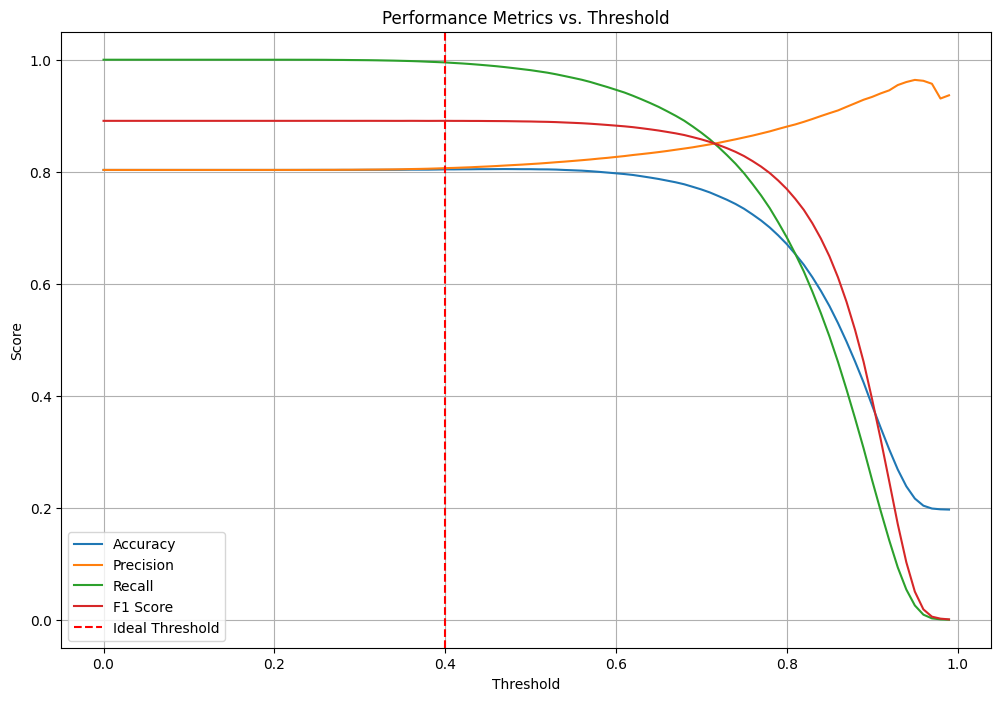

In [ ]:
#### FINDING THE OPTIMAL THRESHOLD WITHOUT CLASS IMBALANCE

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y = df1['loan_status_encoded']
X = df1.drop('loan_status_encoded', axis=1)


# Step 2: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Define a range of thresholds
thresholds = np.arange(0, 1, 0.01)

# Initialize a list to store metrics
metrics = {
    "threshold": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": []
}

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)  # Apply threshold
    metrics["threshold"].append(threshold)
    metrics["accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["precision"].append(precision_score(y_test, y_pred))
    metrics["recall"].append(recall_score(y_test, y_pred))
    metrics["f1"].append(f1_score(y_test, y_pred))

# Convert metrics to DataFrame for easier analysis
metrics_df = pd.DataFrame(metrics)

# Find the threshold that maximizes F1 score
ideal_threshold = metrics_df.loc[metrics_df['f1'].idxmax(), 'threshold']
print(f"Ideal Threshold: {ideal_threshold}")

# Plotting metrics for visualization (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(metrics_df['threshold'], metrics_df['accuracy'], label='Accuracy')
plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['f1'], label='F1 Score')
plt.axvline(ideal_threshold, color='red', linestyle='--', label='Ideal Threshold')
plt.title('Performance Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


In [ ]:
y = df1['loan_status_encoded']
X = df1.drop('loan_status_encoded', axis=1)


# Step 2: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Creating Logistic Regression model with One-vs-Rest strategy
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_probabilities = model.predict_proba(X_test)[:,1]
y_pred = (y_pred_probabilities >= 0.4).astype(int)
# y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC_AUC_Score",roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 0.8043161713338215
Precision: 0.8065080416433145
Recall: 0.9951487337461624
ROC_AUC_Score 0.5100690181353833
F1 Score: 0.8909526690775371
Confusion Matrix:
 [[  584 22786]
 [  463 94976]]


In [ ]:
FPR = 22786/(22786 + 584)
TPR = 94976/(94976+463)
print(FPR)
print(TPR)

0.9750106974753958
0.9951487337461624


In [ ]:
y_pred_probabilities

array([[0.55785014, 0.44214986],
       [0.61054777, 0.38945223],
       [0.6562669 , 0.3437331 ],
       ...,
       [0.35187021, 0.64812979],
       [0.33017651, 0.66982349],
       [0.4315939 , 0.5684061 ]])

In [ ]:
y_pred

array([[1, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 1]])

In [ ]:
### WITH CLASS BALANCING

y = df1['loan_status_encoded']
X = df1.drop('loan_status_encoded', axis=1)


# Step 2: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Creating Logistic Regression model with One-vs-Rest strategy
model = LogisticRegression(class_weight='balanced')

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_probabilities = model.predict_proba(X_test)
y_pred = (y_pred_probabilities[:,1] >= 0.4).astype(int)
# y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC_AUC_Score",roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.747089866929273
Precision: 0.855846148822934
Recall: 0.8239398987835161
ROC_AUC_Score 0.6285938261568416
F1 Score: 0.8395900064061499
Confusion Matrix:
 [[10125 13245]
 [16803 78636]]


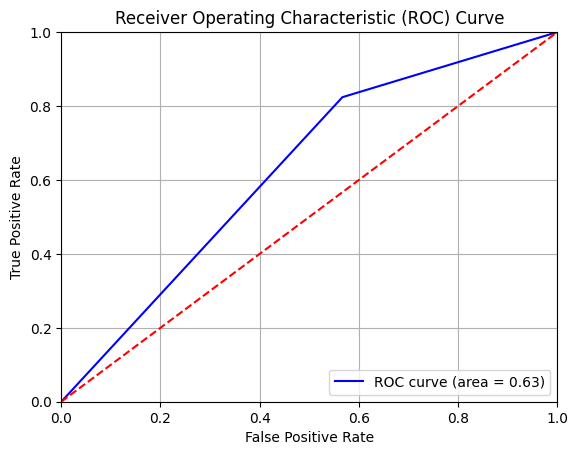

In [ ]:

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [100]}
grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid=param_grid , cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)
y_pred_probabilities = grid.predict_proba(X_test)




{'C': 100}


In [ ]:
# Step 6: Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC_AUC_Score",roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6650422106069406
Precision: 0.8817596772644318
Recall: 0.6733096532863924
ROC_AUC_Score 0.6522945356718653
F1 Score: 0.7635637729033484
Confusion Matrix:
 [[14753  8617]
 [31179 64260]]


**CHECKING THE IDEAL REPAYMENT TERMS**

In [ ]:
### ideal term of loan

df.groupby('term_numeric').agg({'loan_status_encoded':'sum'})



loan_status_encoded
term_numeric                     
36                         254365
60                          63992

In [ ]:
df['loan_status_encoded'].value_counts(normalize=True)*100

loan_status_encoded
1    80.387092
0    19.612908
Name: proportion, dtype: float64

**`ideal term would be around 36 months for loan repayment to increase the likelihood of being paid back`**

In [ ]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'term_numeric', 'pub_rec_flag',
       'mort_acc_flag', 'pub_rec_bankruptcies_flag', 'grade_encoded',
       'sub_grade_encoded', 'emp_length_encoded', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'loan_status_encoded', 'years_since_issue'],
      dtype='object')

In [ ]:
### interest rates

df.groupby('int_rate').agg({'loan_status_encoded':'sum'}).sort_values(by='loan_status_encoded',ascending=False)

loan_status_encoded
int_rate                     
10.99                   10796
12.99                    7910
11.99                    7429
8.90                     7385
7.90                     6815
...                       ...
14.38                       0
14.62                       0
16.15                       0
16.08                       0
17.46                       0

[566 rows x 1 columns]

In [ ]:
interest_rate_summary =  df.groupby('int_rate').agg(
    loans_paid=('loan_status_encoded', lambda x: (x == 1).sum()),  # Count of paid loans
    loans_not_paid=('loan_status_encoded', lambda x: (x == 0).sum()))


In [ ]:
df_loan_paid = df[df['loan_status_encoded']==1]

df_loan_not_paid = df[df['loan_status_encoded']==0]

In [ ]:
a1 = df_loan_paid.groupby('int_rate').agg({'loan_status_encoded':"sum"}).sort_values(by='loan_status_encoded',ascending=False)

loan_status_encoded
int_rate                     
10.99                   10796
12.99                    7910
11.99                    7429
8.90                     7385
7.90                     6815
15.61                    6751
12.12                    6516
6.03                     6114
13.11                    5703
9.17                     5377
15.31                    4980
16.29                    4930
14.33                    4793
11.14                    4734
7.62                     4579
9.99                     4548
13.99                    4329
17.57                    4058
6.62                     3871
16.99                    3849
7.89                     3820
12.69                    3667
18.25                    3658
13.98                    3592
12.49                    3458
12.29                    3212
13.67                    3174
14.65                    3156
17.27                    3053
10.16                    3024
14.99                    2949
11.53                    2937
14.09                    2937
13.33                    2936
9.67                     2853
8.18                     2766
8.39                     2646
15.80                    2642
14.49                    2562
11.67                    2469
13.35                    2456
5.32                     2370
6.49                     2228
10.15                    2189
19.52                    2075
17.77                    2071
18.49                    1916
10.64                    1871
7.69                     1840
17.86                    1749

Ideal interest rates could lie between 8 to 12

In [ ]:
df.groupby('installment').agg({'loan_status_encoded':'sum'}).sort_values(by='loan_status_encoded',ascending=False).head(20)

loan_status_encoded
installment                     
327.34                       822
332.10                       689
491.01                       624
392.81                       598
332.72                       569
337.47                       560
336.90                       558
317.54                       527
654.68                       483
399.26                       476
304.36                       470
381.04                       466
261.88                       461
625.81                       460
635.07                       457
196.41                       455
498.15                       445
318.79                       441
312.91                       428
163.67                       422

Ideal monthly installment could range between 330 to *450*

In [ ]:
df_loan_not_paid.groupby('annual_inc').agg({'loan_status_encoded':"count"}).sort_values(by='loan_status_encoded',ascending=False).head(50)

loan_status_encoded
annual_inc                     
60000.0                    3326
50000.0                    2879
40000.0                    2569
65000.0                    2312
45000.0                    2298
70000.0                    2102
55000.0                    1951
75000.0                    1831
80000.0                    1805
35000.0                    1640
30000.0                    1567
90000.0                    1240
100000.0                   1239
85000.0                    1237
42000.0                    1234
48000.0                    1120
52000.0                    1099
120000.0                    973
36000.0                     927
72000.0                     814
110000.0                    765
25000.0                     755
32000.0                     744
38000.0                     730
62000.0                     661
95000.0                     653
54000.0                     619
56000.0                     613
43000.0                     607
58000.0                     597
68000.0                     570
150000.0                    543
46000.0                     506
53000.0                     481
78000.0                     470
125000.0                    469
37000.0                     448
28000.0                     447
105000.0                    432
41000.0                     426
24000.0                     426
34000.0                     421
47000.0                     419
44000.0                     416
33000.0                     408
130000.0                    397
57000.0                     396
63000.0                     389
49000.0                     385
51000.0                     368

In [ ]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

In [ ]:
df_loan_paid = df[df['loan_status']=="Fully Paid"]

df_loan_not_paid = df[df['loan_status']=="Charged Off"]

In [ ]:
df_loan_paid['address_pincode'].value_counts()

address_pincode
70466    45837
00813    45824
22690    45573
30723    45525
29597    45471
05113    45402
48052    44725
Name: count, dtype: int64

In [ ]:
df_loan_not_paid['address_pincode'].value_counts()

address_pincode
11650    11226
48052    11192
93700    11151
70466    11148
30723    11021
86630    10981
22690    10954
Name: count, dtype: int64

In [ ]:
df_loan_paid.groupby('address_pincode').agg({'loan_status':"count"}).sort_values(by='loan_status',ascending=False).head(500)

loan_status
address_pincode             
70466                  45837
00813                  45824
22690                  45573
30723                  45525
29597                  45471
05113                  45402
48052                  44725